In [58]:
# Load dependencies
import pandas as pd
import numpy as np

import seaborn as sns

# Perform multiple imputation for missing values 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter

# Train / Test split
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [59]:
dfs = pd.read_csv('/Users/Apple/projects/ALS_Digital_Twins/All_processed_data/Results/combined_other_datasets_for_modeling.csv')
df = dfs.copy()
df.head(3)

,subject_id,Event,Vital_capacity,Sex,Onset_site,Study_Arm,European,Age,Diagnostic_Delay,Disease_Duration,TRICALS,Study_id,Expt
0,P01001,0.0,107.0,Male,Limb,Placebo,1,54.762491,13.600526,32.600526,-4.921357,lica,licals
1,P01002,1.0,99.0,Female,Limb,Placebo,1,61.160849,20.137976,41.538765,-6.347018,lica,licals
2,P01003,0.0,102.0,Male,Limb,Active,1,46.702259,15.571616,34.571616,-6.373852,lica,licals


In [60]:
df.shape

(1678, 13)

In [61]:
df.columns

Index(['subject_id', 'Event', 'Vital_capacity', 'Sex', 'Onset_site',
       'Study_Arm', 'European', 'Age', 'Diagnostic_Delay', 'Disease_Duration',
       'TRICALS', 'Study_id', 'Expt'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subject_id        1678 non-null   object 
 1   Event             1678 non-null   float64
 2   Vital_capacity    1678 non-null   float64
 3   Sex               1678 non-null   object 
 4   Onset_site        1678 non-null   object 
 5   Study_Arm         1678 non-null   object 
 6   European          1678 non-null   int64  
 7   Age               1678 non-null   float64
 8   Diagnostic_Delay  1678 non-null   float64
 9   Disease_Duration  1678 non-null   float64
 10  TRICALS           1678 non-null   float64
 11  Study_id          1678 non-null   object 
 12  Expt              1678 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 170.6+ KB


In [63]:
df['Agec'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['TRICALSc'] = (df['TRICALS'] - df['TRICALS'].mean()) / df['TRICALS'].std()

In [64]:
df_time = df[['Disease_Duration', 'Diagnostic_Delay', 'Vital_capacity']]
df_time.describe()
# df_time.isna().sum()

,Disease_Duration,Diagnostic_Delay,Vital_capacity
count,1678.000000,1678.000000,1678.000000
mean,19.616713,5.509496,85.964524
std,12.243001,10.205746,21.991763
min,0.164258,-0.919842,13.873474
25%,12.688896,0.000000,71.584406
50%,17.838371,0.164258,85.627094
75%,24.483715,8.702200,101.000000
max,88.961892,74.310118,158.993367


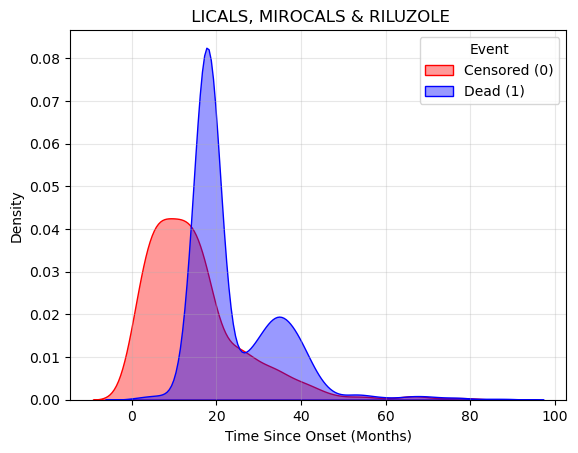

<Figure size 400x300 with 0 Axes>

In [65]:
# Plot distribution of survival time for both groups
sns.kdeplot(
    data=df, x="Disease_Duration", hue="Event",
    fill=True, common_norm=False, alpha=0.4,
    palette={1: "red", 0: "blue"},
);

plt.xlabel("Time Since Onset (Months)")
plt.ylabel("Density")
plt.title(" LICALS, MIROCALS & RILUZOLE")
plt.legend(title="Event", labels=["Censored (0)", "Dead (1)"])
plt.grid(alpha=0.3)
plt.show();

plt.figure(figsize=(4,3));

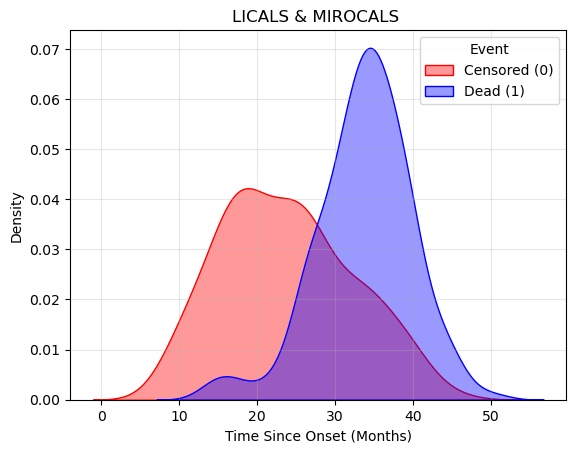

<Figure size 400x300 with 0 Axes>

In [66]:
# Plot distribution of survival time for both groups
df_no_rilu = df[df['Expt'] != 'riluzole']
sns.kdeplot(
    data=df_no_rilu, x="Disease_Duration", hue="Event",
    fill=True, common_norm=False, alpha=0.4,
    palette={1: "red", 0: "blue"},
);

plt.xlabel("Time Since Onset (Months)")
plt.ylabel("Density")
plt.title("LICALS & MIROCALS ")
plt.legend(title="Event", labels=["Censored (0)", "Dead (1)"])
plt.grid(alpha=0.3)
plt.show();

plt.figure(figsize=(4,3));

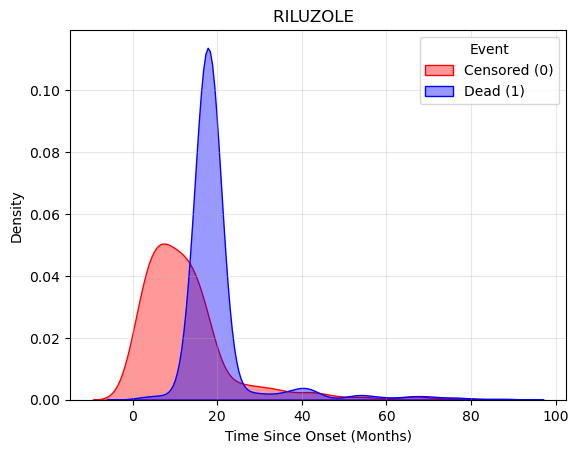

<Figure size 400x300 with 0 Axes>

In [67]:
# Plot distribution of survival time for both groups
df_rilu = df[df['Expt'] == 'riluzole']
sns.kdeplot(
    data=df_rilu, x="Disease_Duration", hue="Event",
    fill=True, common_norm=False, alpha=0.4,
    palette={1: "red", 0: "blue"},
);

plt.xlabel("Time Since Onset (Months)")
plt.ylabel("Density")
plt.title("RILUZOLE  ")
plt.legend(title="Event", labels=["Censored (0)", "Dead (1)"])
plt.grid(alpha=0.3)
plt.show();

plt.figure(figsize=(4,3));

In [68]:
df.Expt.value_counts().to_dict()

{'riluzole': 1282, 'mirocals': 220, 'licals': 176}

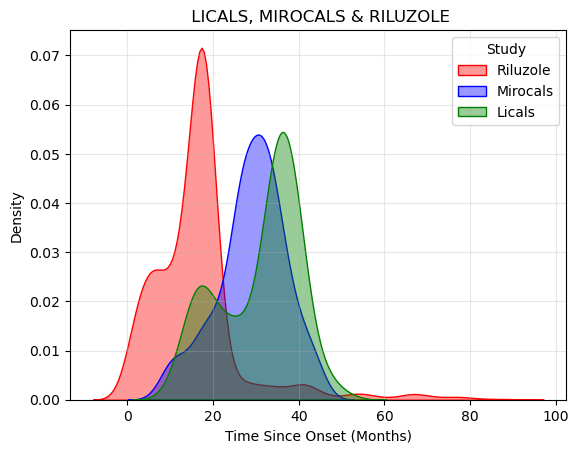

<Figure size 400x300 with 0 Axes>

In [69]:
# Plot distribution of survival time for both groups
sns.kdeplot(
    data=df, x="Disease_Duration", hue="Expt",
    fill=True, common_norm=False, alpha=0.4,
    palette={'riluzole': "red", 'mirocals': "blue" , 'licals': "green"},
);

plt.xlabel("Time Since Onset (Months)")
plt.ylabel("Density")
plt.title(" LICALS, MIROCALS & RILUZOLE")
plt.legend(title="Study", labels=['Riluzole', 'Mirocals', 'Licals'])
plt.grid(alpha=0.3)
plt.show();

plt.figure(figsize=(4,3));

In [70]:
df['Disease_Durationc'] = np.log1p(df['Disease_Duration'])
df['Diagnostic_Delayc'] = np.log1p(df['Diagnostic_Delay'])
df['Vital_capacityc'] = np.log(df['Vital_capacity'])

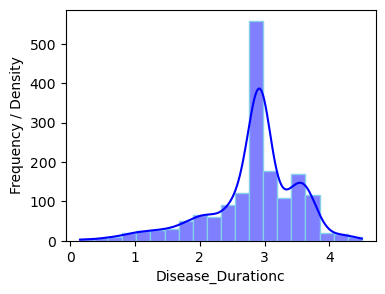

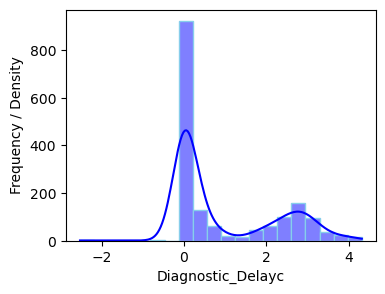

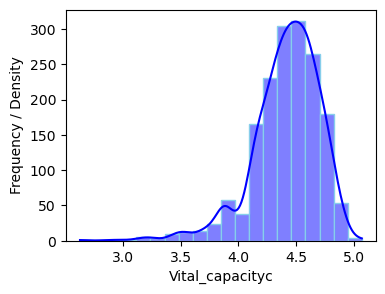

In [71]:
df_time = df[['Disease_Durationc', 'Diagnostic_Delayc', 'Vital_capacityc']]
df_time.describe()

import seaborn as sns
# Plot histogram and density
for col in df_time.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(df[col], bins=20, kde=True, color='blue', edgecolor='skyblue')
    plt.ylabel('Frequency / Density')
    plt.show()

In [72]:
df.columns

Index(['subject_id', 'Event', 'Vital_capacity', 'Sex', 'Onset_site',
       'Study_Arm', 'European', 'Age', 'Diagnostic_Delay', 'Disease_Duration',
       'TRICALS', 'Study_id', 'Expt', 'Agec', 'TRICALSc', 'Disease_Durationc',
       'Diagnostic_Delayc', 'Vital_capacityc'],
      dtype='object')

In [73]:
print(df.columns)

Index(['subject_id', 'Event', 'Vital_capacity', 'Sex', 'Onset_site',
       'Study_Arm', 'European', 'Age', 'Diagnostic_Delay', 'Disease_Duration',
       'TRICALS', 'Study_id', 'Expt', 'Agec', 'TRICALSc', 'Disease_Durationc',
       'Diagnostic_Delayc', 'Vital_capacityc'],
      dtype='object')


In [74]:
df['European'] = df['European'].astype('int')
df['Event'] = df['Event'].astype('int')

In [75]:
df.dtypes

subject_id            object
Event                  int64
Vital_capacity       float64
Sex                   object
Onset_site            object
Study_Arm             object
European               int64
Age                  float64
Diagnostic_Delay     float64
Disease_Duration     float64
TRICALS              float64
Study_id              object
Expt                  object
Agec                 float64
TRICALSc             float64
Disease_Durationc    float64
Diagnostic_Delayc    float64
Vital_capacityc      float64
dtype: object

In [76]:
print(df.shape)
df.head(3)

(1678, 18)


,subject_id,Event,Vital_capacity,Sex,Onset_site,Study_Arm,European,Age,Diagnostic_Delay,Disease_Duration,TRICALS,Study_id,Expt,Agec,TRICALSc,Disease_Durationc,Diagnostic_Delayc,Vital_capacityc
0,P01001,0,107.0,Male,Limb,Placebo,1,54.762491,13.600526,32.600526,-4.921357,lica,licals,-0.251040,-1.068689,3.514542,2.681058,4.672829
1,P01002,1,99.0,Female,Limb,Placebo,1,61.160849,20.137976,41.538765,-6.347018,lica,licals,0.323845,-2.051152,3.750416,3.051071,4.595120
2,P01003,0,102.0,Male,Limb,Active,1,46.702259,15.571616,34.571616,-6.373852,lica,licals,-0.975243,-2.069644,3.571548,2.807691,4.624973


In [77]:
df.Event.value_counts()

Event
0    883
1    795
Name: count, dtype: int64

In [78]:
print(f'Expt: {df['Expt'].value_counts().to_dict()}\n')
print(f'Onset_site: {df['Onset_site'].value_counts().to_dict()}\n')
print(f'Sex: {df['Sex'].value_counts().to_dict()}\n')
print(f'Study_Arm: {df['Study_Arm'].value_counts().to_dict()}\n')
print(f'European: {df['European'].value_counts().to_dict()}\n')

Expt: {'riluzole': 1282, 'mirocals': 220, 'licals': 176}

Onset_site: {'1.0': 1151, 'Limb': 318, '0.0': 82, 'Bulbar': 77, '2.0': 49, 'Other': 1}

Sex: {'1': 748, '0': 534, 'M': 136, 'Male': 126, 'F': 84, 'Female': 50}

Study_Arm: {'ACTIVE': 876, 'PLACEBO': 406, 'Placebo': 197, 'IL2': 110, 'Active': 89}

European: {1: 1649, 2: 9, 3: 8, 4: 7, 0: 4, 5: 1}



In [79]:
mapping = {'Limb': 1, 'Bulbar': 0, 'Other': 1, '1.0': 1,
           '0.0': 0, '2.0': 0, 1.0: 1, 0.0: 0}

df['Onset_site'] = df['Onset_site'].map(mapping)

#________
mapping1 = {'M': 1, 'F': 0, 'Male': 1,'Female': 0, '1': 1, '0': 0}

df['Sex'] = df['Sex'].map(mapping1)

#________
mapping2 = {'IL2': 'Active', 'ACTIVE': 'Active','PLACEBO': 'Placebo', 
            'Active': 'Active','Placebo': 'Placebo'}

df['Study_Arm'] = df['Study_Arm'].map(mapping2)

#________
df['European'] = np.where(df['European'] == 1, 1, 0)

In [80]:
print(f'Expt: {df['Expt'].value_counts().to_dict()}\n')
print(f'Onset_site: {df['Onset_site'].value_counts().to_dict()}\n')
print(f'Sex: {df['Sex'].value_counts().to_dict()}\n')
print(f'Study_Arm: {df['Study_Arm'].value_counts().to_dict()}\n')
print(f'European: {df['European'].value_counts().to_dict()}\n')

Expt: {'riluzole': 1282, 'mirocals': 220, 'licals': 176}

Onset_site: {1: 1470, 0: 208}

Sex: {1: 1010, 0: 668}

Study_Arm: {'Active': 1075, 'Placebo': 603}

European: {1: 1649, 0: 29}



In [81]:
# Identify categorical columns
cat_cols = ['Onset_site', 'European', 'Sex']  # replace with your actual categorical columns

# One-hot encode
df_onehot = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [82]:
# df_onehot.head()

In [83]:
df_onehot.columns

Index(['subject_id', 'Event', 'Vital_capacity', 'Study_Arm', 'Age',
       'Diagnostic_Delay', 'Disease_Duration', 'TRICALS', 'Study_id', 'Expt',
       'Agec', 'TRICALSc', 'Disease_Durationc', 'Diagnostic_Delayc',
       'Vital_capacityc', 'Onset_site_1', 'European_1', 'Sex_1'],
      dtype='object')

In [84]:
# Convert one-hot encoded columns to int
df_onehot['Onset_site_1'] = df_onehot['Onset_site_1'].astype(int)
df_onehot['European_1'] = df_onehot['European_1'].astype(int)
df_onehot['Sex_1'] = df_onehot['Sex_1'].astype(int)

In [85]:
df_onehot.head(2)

,subject_id,Event,Vital_capacity,Study_Arm,Age,Diagnostic_Delay,Disease_Duration,TRICALS,Study_id,Expt,Agec,TRICALSc,Disease_Durationc,Diagnostic_Delayc,Vital_capacityc,Onset_site_1,European_1,Sex_1
0,P01001,0,107.0,Placebo,54.762491,13.600526,32.600526,-4.921357,lica,licals,-0.251040,-1.068689,3.514542,2.681058,4.672829,1,1,1
1,P01002,1,99.0,Placebo,61.160849,20.137976,41.538765,-6.347018,lica,licals,0.323845,-2.051152,3.750416,3.051071,4.595120,1,1,0


In [86]:
# Create interactions
df_onehot['Sex_onset_limb'] = df_onehot['Sex_1']*df_onehot['Onset_site_1']
df_onehot['Age_onset_limb'] = df_onehot['Age']*df_onehot['Onset_site_1']
# df_onehot['Age_Riluzole'] = df_onehot['Age']*df_onehot['Riluzole_use_Yes']
# df_onehot['Trical_Study_Arm'] = df_onehot['TRICALS']*df_onehot['Study_Arm_Placebo']

In [87]:
df_onehot.head(3)

,subject_id,Event,Vital_capacity,Study_Arm,Age,Diagnostic_Delay,Disease_Duration,TRICALS,Study_id,Expt,Agec,TRICALSc,Disease_Durationc,Diagnostic_Delayc,Vital_capacityc,Onset_site_1,European_1,Sex_1,Sex_onset_limb,Age_onset_limb
0,P01001,0,107.0,Placebo,54.762491,13.600526,32.600526,-4.921357,lica,licals,-0.251040,-1.068689,3.514542,2.681058,4.672829,1,1,1,1,54.762491
1,P01002,1,99.0,Placebo,61.160849,20.137976,41.538765,-6.347018,lica,licals,0.323845,-2.051152,3.750416,3.051071,4.595120,1,1,0,0,61.160849
2,P01003,0,102.0,Active,46.702259,15.571616,34.571616,-6.373852,lica,licals,-0.975243,-2.069644,3.571548,2.807691,4.624973,1,1,1,1,46.702259


In [88]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_id         1678 non-null   object 
 1   Event              1678 non-null   int64  
 2   Vital_capacity     1678 non-null   float64
 3   Study_Arm          1678 non-null   object 
 4   Age                1678 non-null   float64
 5   Diagnostic_Delay   1678 non-null   float64
 6   Disease_Duration   1678 non-null   float64
 7   TRICALS            1678 non-null   float64
 8   Study_id           1678 non-null   object 
 9   Expt               1678 non-null   object 
 10  Agec               1678 non-null   float64
 11  TRICALSc           1678 non-null   float64
 12  Disease_Durationc  1678 non-null   float64
 13  Diagnostic_Delayc  1678 non-null   float64
 14  Vital_capacityc    1678 non-null   float64
 15  Onset_site_1       1678 non-null   int64  
 16  European_1         1678 

| **Variable Type**             | **Role in Survival Analysis**               | **Data Type in Python**                                      | **Example**                        | **Typical Preprocessing**                                                                  |
| ----------------------------- | ------------------------------------------- | ------------------------------------------------------------ | ---------------------------------- | ------------------------------------------------------------------------------------------ |
| **Time** (duration)           | Time from start point to event or censoring | `int` or `float` (non-negative)                              | `5, 10.2, 7`                       | Ensure numeric, non-negative; convert units if needed                                      |
| **Event Indicator** (status)  | 1 if event occurred, 0 if censored          | `int` (`0/1`) or `bool`                                      | `1, 0, 1, 0`                       | Convert booleans to integers if required by library                                        |
| **Numeric Covariates**        | Continuous predictors                       | `int` or `float`                                             | `age = 65`, `bp = 120`             | Scale/normalize if desired                                                                 |
| **Categorical Covariates**    | Discrete categories                         | `object` or `category`                                       | `sex = 'male', 'female'`           | Convert to dummy variables with `pd.get_dummies()`                                         |
| **Binary Covariates**         | Yes/No predictors                           | `int` (`0/1`) or `bool`                                      | `smoker = 1`                       | Ensure proper encoding (0/1)                                                               |
| **Time-dependent Covariates** | Variables that change over time             | Structured in **long format** with multiple rows per subject | Weight measurements over follow-up | Reshape dataset; specialized survival functions (`add_covariate_to_timeline` in lifelines) |


In [89]:
# df1 = df_onehot[df_onehot['Study_Arm'] == 'Placebo']
df = df_onehot.copy()

In [90]:
df.columns

Index(['subject_id', 'Event', 'Vital_capacity', 'Study_Arm', 'Age',
       'Diagnostic_Delay', 'Disease_Duration', 'TRICALS', 'Study_id', 'Expt',
       'Agec', 'TRICALSc', 'Disease_Durationc', 'Diagnostic_Delayc',
       'Vital_capacityc', 'Onset_site_1', 'European_1', 'Sex_1',
       'Sex_onset_limb', 'Age_onset_limb'],
      dtype='object')

#### **Get Summary statistics**

In [91]:
from scipy import stats

# Define your grouping variable (e.g., survival outcome, treatment)
group_var = "Event"   # <-- change as needed

# -------------------------------------------------------
# Detect variable types
# -------------------------------------------------------
continuous_vars = df[['Vital_capacity', 'Diagnostic_Delay', 'Disease_Duration', 
                       'Age','TRICALS']].columns.drop(group_var, errors='ignore')

categorical_vars = df[['Study_Arm', 'Study_id', 'Expt',  'Onset_site_1', 'European_1', 'Sex_1', ]].columns

In [92]:
print(continuous_vars.tolist())
print('#-------------------------------------------------------#')
print(categorical_vars.tolist())

['Vital_capacity', 'Diagnostic_Delay', 'Disease_Duration', 'Age', 'TRICALS']
#-------------------------------------------------------#
['Study_Arm', 'Study_id', 'Expt', 'Onset_site_1', 'European_1', 'Sex_1']


In [93]:
# Optionally treat small-unique-number numeric vars as categorical
for col in continuous_vars:
    if df[col].nunique() <= 10:
        categorical_vars = categorical_vars.append(pd.Index([col]))
continuous_vars = [c for c in continuous_vars if c not in categorical_vars]

# -------------------------------------------------------
# Helper summary functions
# -------------------------------------------------------
def summarize_continuous(series):
    """Return Median [IQR]"""
    median = series.median()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    return f"{median:.2f} [{q1:.2f}, {q3:.2f}]"

def summarize_categorical(series):
    """Return n (%)"""
    counts = series.value_counts(dropna=False)
    total = len(series)
    return "; ".join([f"{cat}: {count} ({count/total*100:.1f}%)" for cat, count in counts.items()])

# -------------------------------------------------------
# Statistical tests (p-values)
# -------------------------------------------------------
def get_p_value(df, var, group_var):
    groups = [x.dropna() for _, x in df.groupby(group_var)[var]]
    if len(groups) != 2:
        return np.nan  # only supports 2 groups for now
    g1, g2 = groups

    # Continuous variable -> Mann-Whitney U
    if np.issubdtype(df[var].dtype, np.number):
        try:
            p = stats.mannwhitneyu(g1, g2, alternative='two-sided').pvalue
        except Exception:
            p = np.nan
    else:
        # Categorical variable -> Chi-square or Fisher's exact
        table = pd.crosstab(df[var], df[group_var])
        if table.shape == (2, 2):
            _, p = stats.fisher_exact(table)
        else:
            _, p, _, _ = stats.chi2_contingency(table, correction=False)
    return p

# -------------------------------------------------------
# Build the summary table
# -------------------------------------------------------
summary = {}

# Overall
overall = {}
for col in continuous_vars:
    overall[col] = summarize_continuous(df[col])
for col in categorical_vars:
    overall[col] = summarize_categorical(df[col])
summary["Overall"] = pd.Series(overall)

# Group-specific summaries
for group in sorted(df[group_var].dropna().unique()):
    subset = df[df[group_var] == group]
    group_summary = {}
    for col in continuous_vars:
        group_summary[col] = summarize_continuous(subset[col])
    for col in categorical_vars:
        group_summary[col] = summarize_categorical(subset[col])
    summary[f"{group_var}={group}"] = pd.Series(group_summary)


In [94]:
# p-values
pvals = {}
for col in list(continuous_vars) + list(categorical_vars):
    pvals[col] = get_p_value(df, col, group_var)

summary["p-value"] = pd.Series(pvals)


# Combine into DataFrame
summary_table = pd.DataFrame(summary)
summary_table.index.name = "Variable"

# Format p-values
summary_table["p-value"] = summary_table["p-value"].apply(
    lambda x: f"{x:.3f}" if pd.notnull(x) else ""
)

# -------------------------------------------------------
# Display and save
# -------------------------------------------------------
# print(summary_table)
# summary_table.to_excel("/Users/Apple/Downloads/All_processed_data/summary_table_survival_analysis.xlsx", index=True)

## **Survival model**

In [95]:
df.columns

Index(['subject_id', 'Event', 'Vital_capacity', 'Study_Arm', 'Age',
       'Diagnostic_Delay', 'Disease_Duration', 'TRICALS', 'Study_id', 'Expt',
       'Agec', 'TRICALSc', 'Disease_Durationc', 'Diagnostic_Delayc',
       'Vital_capacityc', 'Onset_site_1', 'European_1', 'Sex_1',
       'Sex_onset_limb', 'Age_onset_limb'],
      dtype='object')

In [96]:
df = df[['subject_id', 'Event', 'Vital_capacityc', 'Sex_1', 'Onset_site_1',
       'Study_Arm', 'European_1', 'Diagnostic_Delay', 'Disease_Duration',
        'Study_id', 'Expt', 'Agec', 'TRICALSc', 'Sex_onset_limb', 'Age_onset_limb']]

df = df.rename(columns={'Agec': 'Age',
                        'Vital_capacityc': 'Vital_capacity',
                        'TRICALSc': 'TRICALS',
                        'European_1': 'European',
                        'Onset_site_1': 'Onset_site',
                        'Sex_1': 'Sex'
                        })

In [97]:
df.head(3)

,subject_id,Event,Vital_capacity,Sex,Onset_site,Study_Arm,European,Diagnostic_Delay,Disease_Duration,Study_id,Expt,Age,TRICALS,Sex_onset_limb,Age_onset_limb
0,P01001,0,4.672829,1,1,Placebo,1,13.600526,32.600526,lica,licals,-0.251040,-1.068689,1,54.762491
1,P01002,1,4.595120,0,1,Placebo,1,20.137976,41.538765,lica,licals,0.323845,-2.051152,0,61.160849
2,P01003,0,4.624973,1,1,Active,1,15.571616,34.571616,lica,licals,-0.975243,-2.069644,1,46.702259


In [98]:
df.loc[df["Study_id"] == "lica", "Study_id"] = "Licals"
df.loc[df["Study_id"] == "miro", "Study_id"] = "mirocals"
df.loc[df["Study_id"] == "216", "Study_id"] = "Riluzole (216)"
df.loc[df["Study_id"] == "301", "Study_id"] = "Riluzole (301)"
df.loc[df["Study_id"] == "302", "Study_id"] = "Riluzole (302)"

#### **K-M**

Text(0, 0.5, 'Survival Probability')

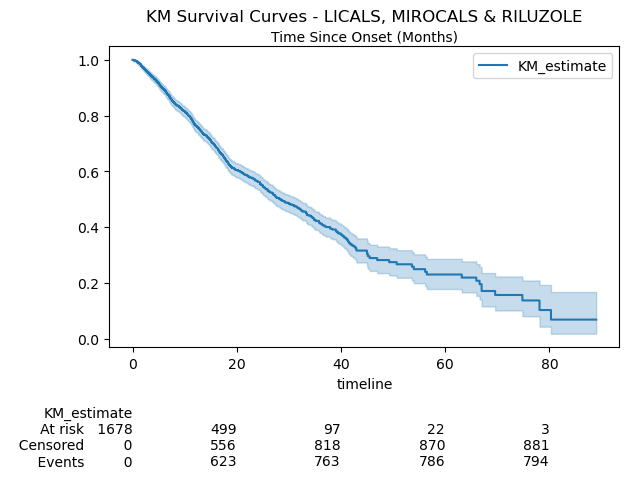

In [99]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df['Disease_Duration'], event_observed = df['Event'])

# kmf.survival_function_.plot()
kmf.plot_survival_function(at_risk_counts = True)
plt.title('KM Survival Curves - LICALS, MIROCALS & RILUZOLE')
plt.xlabel('Time Since Onset (Months)')
plt.ylabel('Survival Probability')

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_76172/3242869272.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Clinical Trials Cluster")


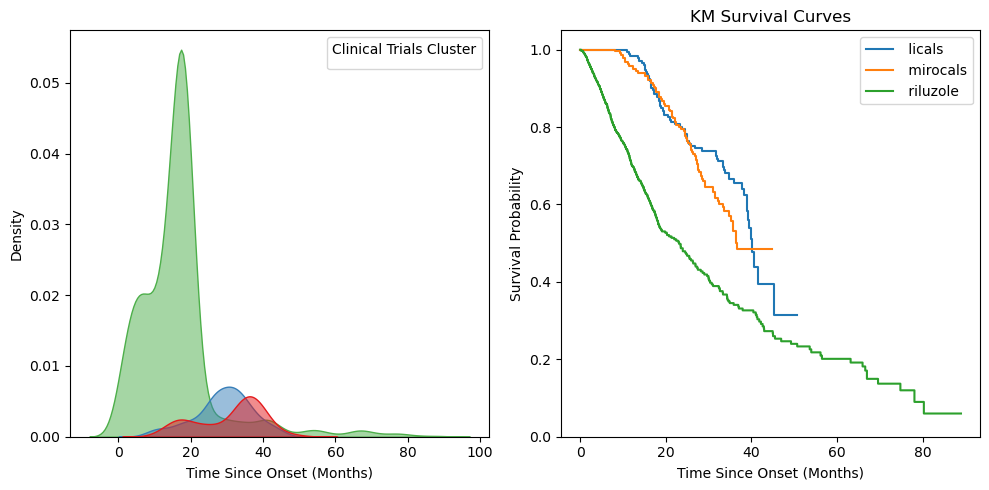

In [100]:
# create side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Plot 1: KDE plot ---
sns.kdeplot(data=df, x='Disease_Duration', hue='Expt', fill=True, alpha=0.5, palette='Set1', ax=axes[0])
# axes[0].set_title("Clinical Trials Grouping of Survival Times")
axes[0].set_xlabel("Time Since Onset (Months)")
axes[0].set_ylabel("Density")
axes[0].legend(title="Clinical Trials Cluster")
# --- Plot 2: Kaplan-Meier curves ---
kmf = KaplanMeierFitter()
for group in sorted(df['Expt'].unique()):
    mask = df['Expt'] == group
    subset = df.loc[mask, ['Disease_Duration', 'Event']].dropna()
    if subset.empty:
        print(f"Skipping empty group {group}")
        continue
    kmf.fit(subset['Disease_Duration'], subset['Event'], label=f' {group}')
    kmf.plot(ax=axes[1], ci_show=False)  # plot on second subplot

axes[1].set_title("KM Survival Curves")
axes[1].set_xlabel("Time Since Onset (Months)")
axes[1].set_ylabel("Survival Probability")
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_76172/170623229.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Clinical Trials Cluster")


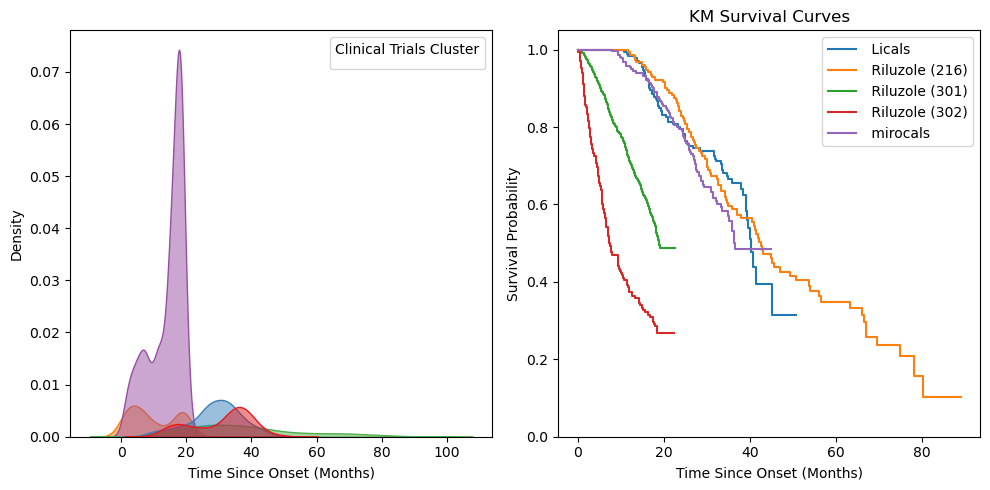

In [101]:
# create side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Plot 1: KDE plot ---
sns.kdeplot(data=df, x='Disease_Duration', hue='Study_id', fill=True, alpha=0.5, palette='Set1', ax=axes[0])
# axes[0].set_title("Clinical Trials Grouping of Survival Times")
axes[0].set_xlabel("Time Since Onset (Months)")
axes[0].set_ylabel("Density")
axes[0].legend(title="Clinical Trials Cluster")


# --- Plot 2: Kaplan-Meier curves ---
kmf = KaplanMeierFitter()
for group in sorted(df['Study_id'].unique()):
    mask = df['Study_id'] == group
    subset = df.loc[mask, ['Disease_Duration', 'Event']].dropna()
    if subset.empty:
        print(f"Skipping empty group {group}")
        continue
    kmf.fit(subset['Disease_Duration'], subset['Event'], label=f' {group}')
    kmf.plot(ax=axes[1], ci_show=False)  # plot on second subplot

axes[1].set_title("KM Survival Curves")
axes[1].set_xlabel("Time Since Onset (Months)")
axes[1].set_ylabel("Survival Probability")
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_76172/1912984211.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Clinical Trials Cluster")


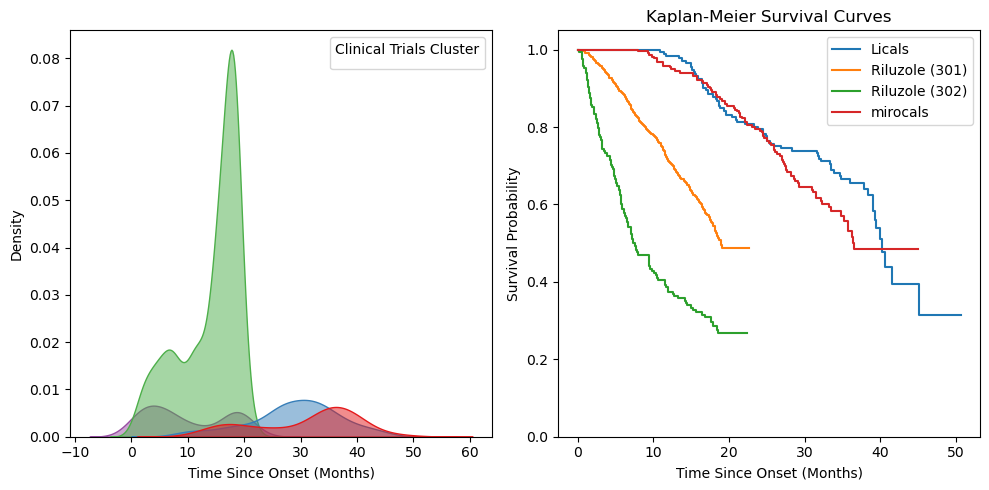

In [105]:
# create side-by-side plot

df_no_216 = df[df['Study_id'] != 'Riluzole (216)']
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Plot 1: KDE plot ---
sns.kdeplot(data=df_no_216, x='Disease_Duration', hue='Study_id', fill=True, alpha=0.5, palette='Set1', ax=axes[0])
# axes[0].set_title("Clinical Trials Grouping of Survival Times")
axes[0].set_xlabel("Time Since Onset (Months)")
axes[0].set_ylabel("Density")
axes[0].legend(title="Clinical Trials Cluster")


# --- Plot 2: Kaplan-Meier curves ---
kmf = KaplanMeierFitter()
for group in sorted(df_no_216['Study_id'].unique()):
    mask = df_no_216['Study_id'] == group
    subset = df_no_216.loc[mask, ['Disease_Duration', 'Event']].dropna()
    if subset.empty:
        print(f"Skipping empty group {group}")
        continue
    kmf.fit(subset['Disease_Duration'], subset['Event'], label=f'{group}')
    kmf.plot(ax=axes[1], ci_show=False)  # plot on second subplot

axes[1].set_title("Kaplan-Meier Survival Curves")
axes[1].set_xlabel("Time Since Onset (Months)")
axes[1].set_ylabel("Survival Probability")
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_76172/3259401348.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Clinical Trials Cluster")


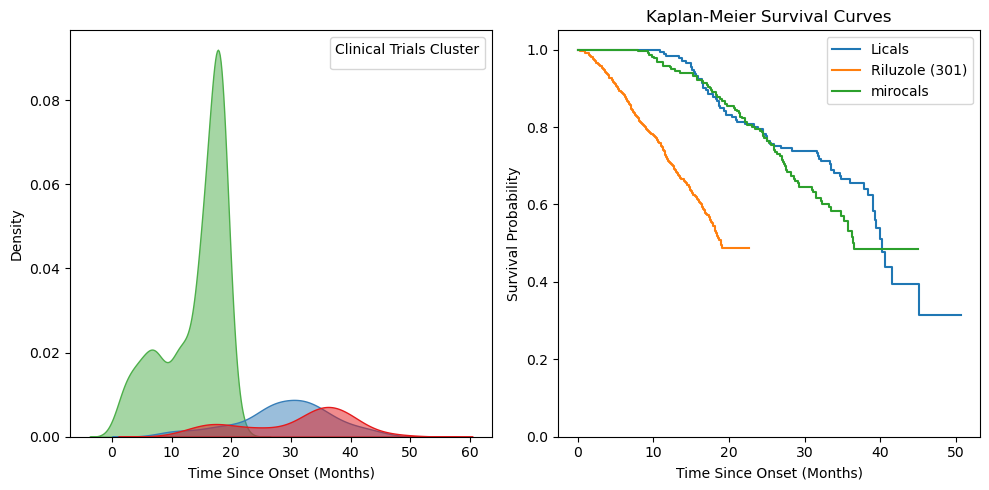

In [106]:
# create side-by-side plot

df_no_216 = df[df['Study_id'] != 'Riluzole (216)']
df_no_216_302 = df_no_216[df_no_216['Study_id'] != 'Riluzole (302)']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Plot 1: KDE plot ---
sns.kdeplot(data=df_no_216_302, x='Disease_Duration', hue='Study_id', fill=True, alpha=0.5, palette='Set1', ax=axes[0])
# axes[0].set_title("Clinical Trials Grouping of Survival Times")
axes[0].set_xlabel("Time Since Onset (Months)")
axes[0].set_ylabel("Density")
axes[0].legend(title="Clinical Trials Cluster")


# --- Plot 2: Kaplan-Meier curves ---
kmf = KaplanMeierFitter()
for group in sorted(df_no_216_302['Study_id'].unique()):
    mask = df_no_216_302['Study_id'] == group
    subset = df_no_216_302.loc[mask, ['Disease_Duration', 'Event']].dropna()
    if subset.empty:
        print(f"Skipping empty group {group}")
        continue
    kmf.fit(subset['Disease_Duration'], subset['Event'], label=f'{group}')
    kmf.plot(ax=axes[1], ci_show=False)  # plot on second subplot

axes[1].set_title("Kaplan-Meier Survival Curves")
axes[1].set_xlabel("Time Since Onset (Months)")
axes[1].set_ylabel("Survival Probability")
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_76172/3766388312.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Clinical Trials Cluster")


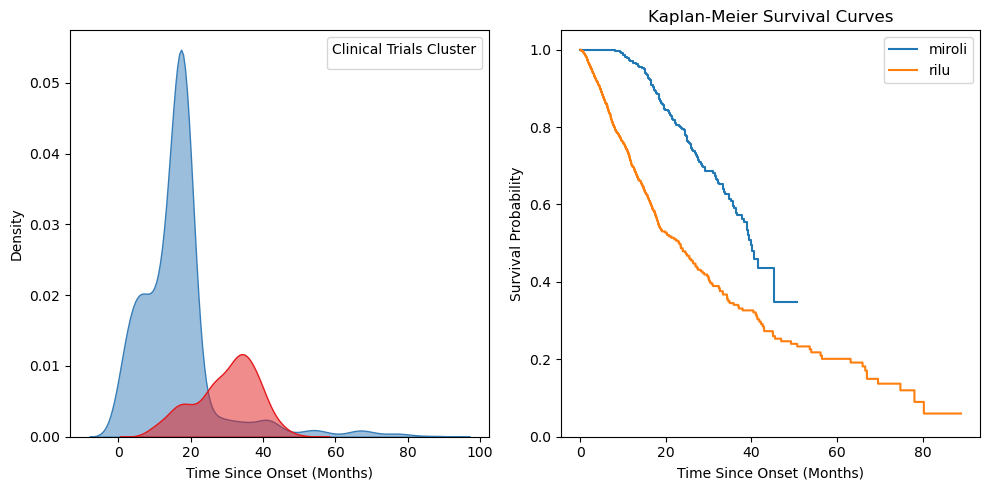

In [104]:
# create side-by-side plot

df_no_216 = df[df['Study_id'] != '216']
df_no_216_302 = df_no_216[df_no_216['Study_id'] != '302']

df_no_216_302['miroli'] = np.where(df_no_216_302['Expt'].isin(['mirocals', 'licals']), 'miroli', 'rilu')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Plot 1: KDE plot ---
sns.kdeplot(data=df_no_216_302, x='Disease_Duration', hue='miroli', fill=True, alpha=0.5, palette='Set1', ax=axes[0])
# axes[0].set_title("Clinical Trials Grouping of Survival Times")
axes[0].set_xlabel("Time Since Onset (Months)")
axes[0].set_ylabel("Density")
axes[0].legend(title="Clinical Trials Cluster")


# --- Plot 2: Kaplan-Meier curves ---
kmf = KaplanMeierFitter()
for group in sorted(df_no_216_302['miroli'].unique()):
    mask = df_no_216_302['miroli'] == group
    subset = df_no_216_302.loc[mask, ['Disease_Duration', 'Event']].dropna()
    if subset.empty:
        print(f"Skipping empty group {group}")
        continue
    kmf.fit(subset['Disease_Duration'], subset['Event'], label=f'{group}')
    kmf.plot(ax=axes[1], ci_show=False)  # plot on second subplot

axes[1].set_title("Kaplan-Meier Survival Curves")
axes[1].set_xlabel("Time Since Onset (Months)")
axes[1].set_ylabel("Survival Probability")
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_89077/2247950817.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Clinical Trials Cluster")


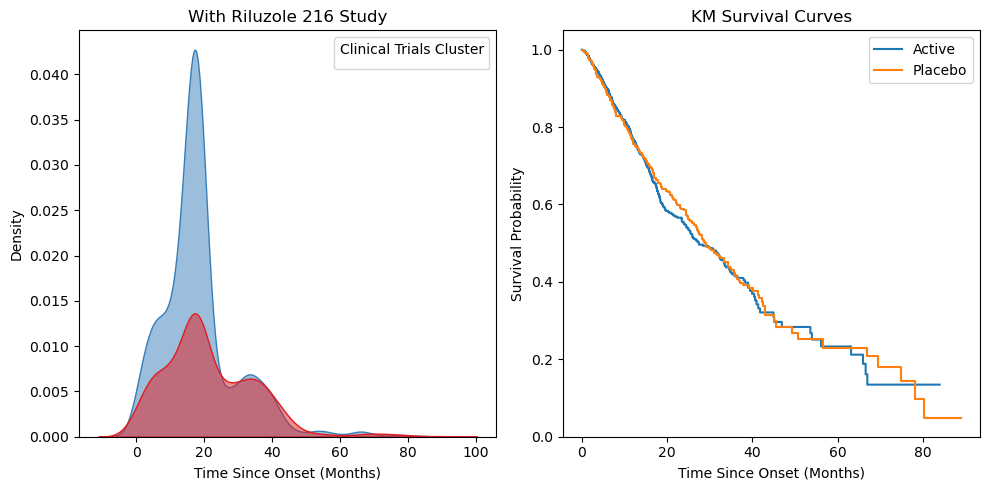

In [173]:
# create side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Plot 1: KDE plot ---
sns.kdeplot(data=df, x='Disease_Duration', hue='Study_Arm', fill=True, alpha=0.5, palette='Set1', ax=axes[0])
# axes[0].set_title("Clinical Trials Grouping of Survival Times")
axes[0].set_title("With Riluzole 216 Study")
axes[0].set_xlabel("Time Since Onset (Months)")
axes[0].set_ylabel("Density")
axes[0].legend(title="Clinical Trials Cluster")


# --- Plot 2: Kaplan-Meier curves ---
kmf = KaplanMeierFitter()
for group in sorted(df['Study_Arm'].unique()):
    mask = df['Study_Arm'] == group
    subset = df.loc[mask, ['Disease_Duration', 'Event']].dropna()
    if subset.empty:
        print(f"Skipping empty group {group}")
        continue
    kmf.fit(subset['Disease_Duration'], subset['Event'], label=f'{group}')
    kmf.plot(ax=axes[1], ci_show=False)  # plot on second subplot

axes[1].set_title("KM Survival Curves")
axes[1].set_xlabel("Time Since Onset (Months)")
axes[1].set_ylabel("Survival Probability")
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

/var/folders/j8/3lv4xqz91g19302n7m7g_x6c0000gn/T/ipykernel_89077/660034024.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Clinical Trials Cluster")


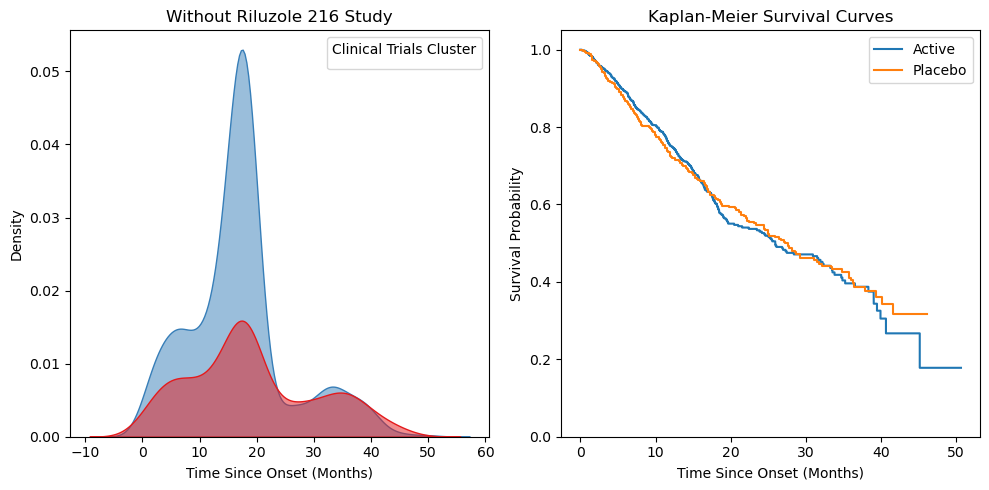

In [174]:
df_no_216 = df[df['Study_id'] != '216']

# create side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Plot 1: KDE plot ---
sns.kdeplot(data=df_no_216, x='Disease_Duration', hue='Study_Arm', fill=True, alpha=0.5, palette='Set1', ax=axes[0])
axes[0].set_title("Without Riluzole 216 Study")
axes[0].set_xlabel("Time Since Onset (Months)")
axes[0].set_ylabel("Density")
axes[0].legend(title="Clinical Trials Cluster")


# --- Plot 2: Kaplan-Meier curves ---
kmf = KaplanMeierFitter()
for group in sorted(df_no_216['Study_Arm'].unique()):
    mask = df_no_216['Study_Arm'] == group
    subset = df_no_216.loc[mask, ['Disease_Duration', 'Event']].dropna()
    if subset.empty:
        print(f"Skipping empty group {group}")
        continue
    kmf.fit(subset['Disease_Duration'], subset['Event'], label=f'{group}')
    kmf.plot(ax=axes[1], ci_show=False)  # plot on second subplot

axes[1].set_title("Kaplan-Meier Survival Curves")
axes[1].set_xlabel("Time Since Onset (Months)")
axes[1].set_ylabel("Survival Probability")
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

#### **Cox PH**

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subject_id        1678 non-null   object 
 1   Event             1678 non-null   int64  
 2   Vital_capacity    1678 non-null   float64
 3   Sex               1678 non-null   int64  
 4   Onset_site        1678 non-null   int64  
 5   Study_Arm         1678 non-null   object 
 6   European          1678 non-null   int64  
 7   Diagnostic_Delay  1678 non-null   float64
 8   Disease_Duration  1678 non-null   float64
 9   Study_id          1678 non-null   object 
 10  Expt              1678 non-null   object 
 11  Age               1678 non-null   float64
 12  TRICALS           1678 non-null   float64
 13  Sex_onset_limb    1678 non-null   int64  
 14  Age_onset_limb    1678 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 196.8+ KB


In [176]:
# Identify categorical columns
cat_cols1 = ['Expt', 'Study_Arm', 'Study_id']  # replace with your actual categorical columns

# One-hot encode
df_onehot1 = pd.get_dummies(df, columns=cat_cols1, drop_first=True)

df_onehot1['Study_Arm_Placebo'] = df_onehot1['Study_Arm_Placebo'].astype(int)
df_onehot1['Expt_riluzole'] = df_onehot1['Expt_riluzole'].astype(int)
df_onehot1['Expt_mirocals'] = df_onehot1['Expt_mirocals'].astype(int)

df_onehot1['Study_id_301'] = df_onehot1['Study_id_301'].astype(int)
df_onehot1['Study_id_302'] = df_onehot1['Study_id_302'].astype(int)
df_onehot1['Study_id_lica'] = df_onehot1['Study_id_lica'].astype(int)
df_onehot1['Study_id_miro'] = df_onehot1['Study_id_miro'].astype(int)

In [177]:
df_onehot1.head(2)

,subject_id,Event,Vital_capacity,Sex,Onset_site,European,Diagnostic_Delay,Disease_Duration,Age,TRICALS,Sex_onset_limb,Age_onset_limb,Expt_mirocals,Expt_riluzole,Study_Arm_Placebo,Study_id_301,Study_id_302,Study_id_lica,Study_id_miro
0,P01001,0,4.672829,1,1,1,13.600526,32.600526,-0.251040,-1.068689,1,54.762491,0,0,1,0,0,1,0
1,P01002,1,4.595120,0,1,1,20.137976,41.538765,0.323845,-2.051152,0,61.160849,0,0,1,0,0,1,0


In [178]:
# Train / Test split

# Separate features from survival info
X = df_onehot1.drop(columns=['Disease_Duration', 'Event'])
y_duration = df_onehot1['Disease_Duration']
y_event = df_onehot1['Event']

# Split
X_train, X_test, y_duration_train, y_duration_test, y_event_train, y_event_test = train_test_split(
    X, y_duration, y_event, test_size=0.2, random_state=4
)

# Combine back for lifelines format
train_df = X_train.copy()
train_df['Disease_Duration'] = y_duration_train
train_df['Event'] = y_event_train

test_df = X_test.copy()
test_df['Disease_Duration'] = y_duration_test
test_df['Event'] = y_event_test

# print(train_df)
# print(test_df)


In [179]:
df.shape

(1678, 15)

In [180]:
print(train_df.shape, test_df.shape)

(1342, 19) (336, 19)


In [181]:
from lifelines.utils import concordance_index


def backward_elimination_survival(
    train_df, test_df, duration_col, event_col, threshold=0.05, verbose=True
):
    """
    Perform backward elimination for survival analysis using CoxPH model.

    Parameters
    ----------
    train_df : pd.DataFrame
        Training dataset including features, duration_col, and event_col.
    test_df : pd.DataFrame
        Test dataset including features, duration_col, and event_col.
    duration_col : str
        Name of the duration column.
    event_col : str
        Name of the event indicator column (1=event, 0=censored).
    threshold : float
        p-value threshold for variable removal.
    verbose : bool
        Whether to print progress.

    Returns
    -------
    dict with keys:
        - "final_model": fitted CoxPHFitter object
        - "aic": final model AIC
        - "cindex_train": concordance index on training set
        - "cindex_test": concordance index on test set
        - "selected_variables": list of chosen predictors
    """

    predictors = [col for col in train_df.columns if col not in [duration_col, event_col]]
    
    while True:
        cph = CoxPHFitter()
        cph.fit(train_df[[duration_col, event_col] + predictors], duration_col, event_col)
        
        # Evaluate
        aic = cph.AIC_partial_
        cindex_train = concordance_index(
            train_df[duration_col], -cph.predict_partial_hazard(train_df), train_df[event_col]
        )
        cindex_test = concordance_index(
            test_df[duration_col], -cph.predict_partial_hazard(test_df), test_df[event_col]
        )

        if verbose:
            print("\nModel with variables:", predictors)
            print(f"AIC = {aic:.3f}, Train C-index = {cindex_train:.3f}, Test C-index = {cindex_test:.3f}")

        # Check highest p-value
        summary = cph.summary.sort_values("p")
        worst_pval = summary["p"].max()
        worst_feature = summary["p"].idxmax()

        if worst_pval > threshold:
            if verbose:
                print(f"Removing {worst_feature} (p = {worst_pval:.3f})")
            predictors.remove(worst_feature)
        else:
            break  # stop when all features are significant

    return {
        "final_model": cph,
        "aic": aic,
        "cindex_train": cindex_train,
        "cindex_test": cindex_test,
        "selected_variables": predictors,
    }


In [182]:
df_onehot1.columns

Index(['subject_id', 'Event', 'Vital_capacity', 'Sex', 'Onset_site',
       'European', 'Diagnostic_Delay', 'Disease_Duration', 'Age', 'TRICALS',
       'Sex_onset_limb', 'Age_onset_limb', 'Expt_mirocals', 'Expt_riluzole',
       'Study_Arm_Placebo', 'Study_id_301', 'Study_id_302', 'Study_id_lica',
       'Study_id_miro'],
      dtype='object')

In [183]:
train_dff = train_df.drop(columns=['subject_id', 'Expt_mirocals',
       'Expt_riluzole', 'Study_Arm_Placebo', 'Study_id_301', 'Study_id_302',
       'Study_id_lica', 'Study_id_miro'])

test_dff = test_df.drop(columns=['subject_id', 'Expt_mirocals',
       'Expt_riluzole', 'Study_Arm_Placebo', 'Study_id_301', 'Study_id_302',
       'Study_id_lica', 'Study_id_miro'])

backward_elimination_survival(train_df = train_dff, test_df = test_dff, 
                              duration_col = 'Disease_Duration', event_col = 'Event', 
                              threshold=0.05, verbose=False)


{'final_model': <lifelines.CoxPHFitter: fitted with 1342 total observations, 708 right-censored observations>,
 'aic': np.float64(7090.510268201203),
 'cindex_train': np.float64(0.882868485562843),
 'cindex_test': np.float64(0.8707151257852614),
 'selected_variables': ['Vital_capacity',
  'Onset_site',
  'Diagnostic_Delay',
  'Age',
  'TRICALS']}

In [184]:
cph = CoxPHFitter()

covars = [
  'Vital_capacity',
  'Diagnostic_Delay',
  'Age', 'Sex',
  'TRICALS', 
  'Onset_site'#, 'European_1'

  ]

cph.fit(train_dff[["Disease_Duration", "Event"] + covars], duration_col="Disease_Duration", event_col="Event")
cph.print_summary()
result = cph.summary.round(2)
# result.to_csv('/Users/Apple/Downloads/01_DigitalTwin_2/Results_06_10_2025/ALS_Baseline_CoxPH_results.csv')

<lifelines.CoxPHFitter: fitted with 1342 total observations, 708 right-censored observations>
             duration col = 'Disease_Duration'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 1342
number of events observed = 634
   partial log-likelihood = -3540.07
         time fit was run = 2025-11-17 18:44:08 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
Vital_capacity    1.83      6.21      0.19            1.46            2.19                4.31                8.96
Diagnostic_Delay  0.05      1.05      0.01            0.03            0.07                1.03                1.08
Age              -0.36      0.70      0.06           -0.48           -0.23                0.62                0.79
Sex              -0.05      0.95      0.08           -0.21            0.11                0.81                1.12
TRICALS           3.55     34.74      0.16            3.23            3.87               25.22               47.86
Onset_site        0.59      1.81      0.15            0.30            0.89                1.35                2.42

                  cmp to     z      p  -log2(p)
covariate                                      
Vital_capacity      0.00  9.77 <0.005     72.54
Diagnostic_Delay    0.00  4.11 <0.005     14.64
Age                 0.00 -5.78 <0.005     27.04
Sex                 0.00 -0.61   0.54      0.89
TRICALS             0.00 21.71 <0.005    344.71
Onset_site          0.00  3.99 <0.005     13.90
---
Concordance = 0.88
Partial AIC = 7092.14
log-likelihood ratio test = 1207.66 on 6 df
-log2(p) of ll-ratio test = 853.66

Text(0.5, 1.0, 'LICALS, MIROCALS, & RILUZOLE')

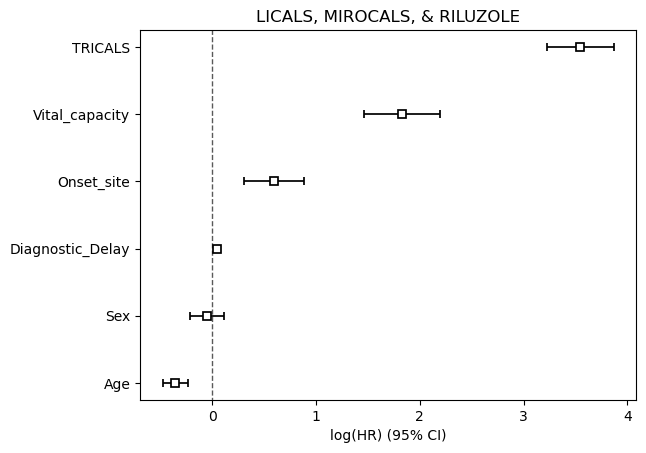

In [185]:
cph.plot()
plt.title("LICALS, MIROCALS, & RILUZOLE")

In [186]:
# Check model performance on test set
from lifelines.utils import concordance_index

# Predict partial hazards (risk scores) on test set
test_pred = cph.predict_partial_hazard(test_dff)

# Concordance Index
c_index = concordance_index(
    event_times=test_dff["Disease_Duration"],
    predicted_scores=-test_pred,   # negative, because higher hazard = higher risk
    event_observed=test_dff["Event"]
)

print("C-index on test set:", c_index)


C-index on test set: 0.8700553627262557


In [187]:
# train_df = train_df.drop(columns='Study_Arm')

In [188]:
train_dff.columns

Index(['Vital_capacity', 'Sex', 'Onset_site', 'European', 'Diagnostic_Delay',
       'Age', 'TRICALS', 'Sex_onset_limb', 'Age_onset_limb',
       'Disease_Duration', 'Event'],
      dtype='object')

#### **Include study and study arm as covariates**

In [189]:
train_dff1 = train_df.drop(columns=['subject_id', 'Expt_mirocals',
       'Expt_riluzole', 'Study_Arm_Placebo'])

test_dff1 = test_df.drop(columns=['subject_id', 'Expt_mirocals',
       'Expt_riluzole', 'Study_Arm_Placebo'])

backward_elimination_survival(train_df = train_dff1, test_df = test_dff1, 
                              duration_col = 'Disease_Duration', event_col = 'Event', 
                              threshold=0.05, verbose=False)

{'final_model': <lifelines.CoxPHFitter: fitted with 1342 total observations, 708 right-censored observations>,
 'aic': np.float64(7046.715560151908),
 'cindex_train': np.float64(0.8845298613772606),
 'cindex_test': np.float64(0.8717477983993575),
 'selected_variables': ['Vital_capacity',
  'Onset_site',
  'Age',
  'TRICALS',
  'Study_id_301',
  'Study_id_302',
  'Study_id_miro']}

In [190]:
cph = CoxPHFitter()

covars = [
  'Vital_capacity',
  'Age', 'Sex',
  'TRICALS',
  'Onset_site',
  'Study_id_301',
  'Study_id_302',
  'Study_id_miro', 'Study_id_lica'
  ]

cph.fit(train_dff1[["Disease_Duration", "Event"] + covars], duration_col="Disease_Duration", event_col="Event")
cph.print_summary()
result = cph.summary.round(2)
# result.to_csv('/Users/Apple/Downloads/01_DigitalTwin_2/Results_06_10_2025/ALS_Baseline_CoxPH_results.csv')

<lifelines.CoxPHFitter: fitted with 1342 total observations, 708 right-censored observations>
             duration col = 'Disease_Duration'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 1342
number of events observed = 634
   partial log-likelihood = -3515.31
         time fit was run = 2025-11-17 18:44:09 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
Vital_capacity  1.47      4.34      0.20            1.08            1.86                2.93                6.42
Age            -0.34      0.71      0.06           -0.46           -0.22                0.63                0.80
Sex            -0.12      0.89      0.08           -0.28            0.04                0.75                1.04
TRICALS         3.68     39.63      0.15            3.38            3.98               29.43               53.36
Onset_site      0.67      1.96      0.15            0.38            0.97                1.47                2.63
Study_id_301   -1.22      0.29      0.20           -1.61           -0.84                0.20                0.43
Study_id_302   -1.88      0.15      0.25           -2.37           -1.38                0.09                0.25
Study_id_miro  -0.48      0.62      0.19           -0.85           -0.10                0.43                0.90
Study_id_lica   0.01      1.01      0.20           -0.38            0.40                0.69                1.50

                cmp to     z      p  -log2(p)
covariate                                    
Vital_capacity    0.00  7.34 <0.005     42.12
Age               0.00 -5.64 <0.005     25.81
Sex               0.00 -1.45   0.15      2.76
TRICALS           0.00 24.25 <0.005    429.01
Onset_site        0.00  4.54 <0.005     17.44
Study_id_301      0.00 -6.20 <0.005     30.73
Study_id_302      0.00 -7.45 <0.005     43.34
Study_id_miro     0.00 -2.49   0.01      6.30
Study_id_lica     0.00  0.07   0.94      0.08
---
Concordance = 0.88
Partial AIC = 7048.63
log-likelihood ratio test = 1257.17 on 9 df
-log2(p) of ll-ratio test = 877.85

Text(0.5, 1.0, ' LICALS, MIROCALS & RILUZOLE as covariates')

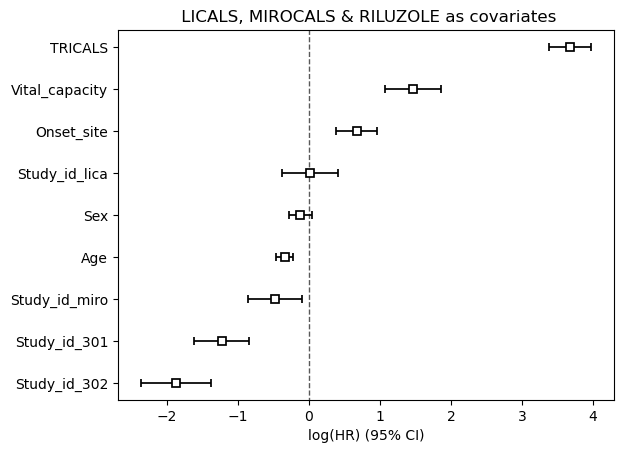

In [191]:
cph.plot()
plt.title(" LICALS, MIROCALS & RILUZOLE as covariates")

In [192]:
# Check model performance on test set
from lifelines.utils import concordance_index

# Predict partial hazards (risk scores) on test set
test_pred = cph.predict_partial_hazard(test_dff1)

# Concordance Index
c_index = concordance_index(
    event_times=test_dff1["Disease_Duration"],
    predicted_scores=-test_pred,   # negative, because higher hazard = higher risk
    event_observed=test_dff1["Event"]
)

print("C-index on test set:", c_index)

C-index on test set: 0.8701127334270388


In [193]:
train_dff1.columns

Index(['Vital_capacity', 'Sex', 'Onset_site', 'European', 'Diagnostic_Delay',
       'Age', 'TRICALS', 'Sex_onset_limb', 'Age_onset_limb', 'Study_id_301',
       'Study_id_302', 'Study_id_lica', 'Study_id_miro', 'Disease_Duration',
       'Event'],
      dtype='object')

## ***Compute prognostic score (centered at mean)***

<lifelines.CoxPHFitter: fitted with 1342 total observations, 708 right-censored observations>
             duration col = 'Disease_Duration'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 1342
number of events observed = 634
   partial log-likelihood = -3540.07
         time fit was run = 2025-11-17 18:44:10 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
Vital_capacity    1.83      6.21      0.19            1.46            2.19                4.31                8.96
Diagnostic_Delay  0.05      1.05      0.01            0.03            0.07                1.03                1.08
Age              -0.36      0.70      0.06           -0.48           -0.23                0.62                0.79
Sex              -0.05      0.95      0.08           -0.21            0.11                0.81                1.12
TRICALS           3.55     34.74      0.16            3.23            3.87               25.22               47.86
Onset_site        0.59      1.81      0.15            0.30            0.89                1.35                2.42

                  cmp to     z      p  -log2(p)
covariate                                      
Vital_capacity      0.00  9.77 <0.005     72.54
Diagnostic_Delay    0.00  4.11 <0.005     14.64
Age                 0.00 -5.78 <0.005     27.04
Sex                 0.00 -0.61   0.54      0.89
TRICALS             0.00 21.71 <0.005    344.71
Onset_site          0.00  3.99 <0.005     13.90
---
Concordance = 0.88
Partial AIC = 7092.14
log-likelihood ratio test = 1207.66 on 6 df
-log2(p) of ll-ratio test = 853.66

Text(0.5, 1.0, ' LICALS, MIROCALS & RILUZOLE as covariates')

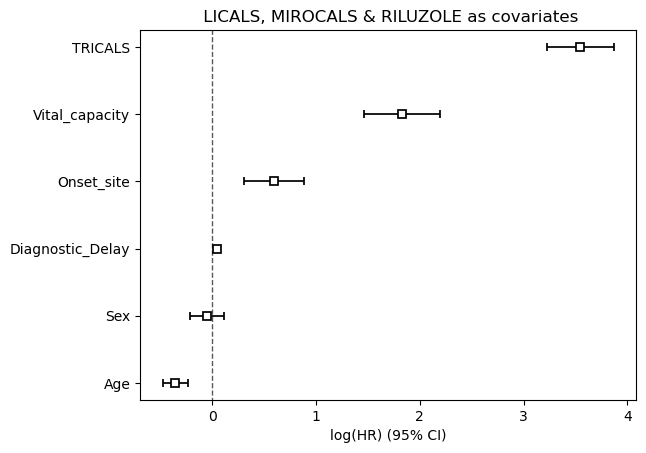

In [194]:
train_dff = train_df.drop(columns=['subject_id', 'Expt_mirocals',
       'Expt_riluzole', 'Study_Arm_Placebo', 'Study_id_301', 'Study_id_302',
       'Study_id_lica', 'Study_id_miro'])

test_dff = test_df.drop(columns=['subject_id', 'Expt_mirocals',
       'Expt_riluzole', 'Study_Arm_Placebo', 'Study_id_301', 'Study_id_302',
       'Study_id_lica', 'Study_id_miro'])

backward_elimination_survival(train_df = train_dff, test_df = test_dff, 
                              duration_col = 'Disease_Duration', event_col = 'Event', 
                              threshold=0.05, verbose=False)

cph = CoxPHFitter()

covars = [
  'Vital_capacity',
  'Diagnostic_Delay',
  'Age', 'Sex',
  'TRICALS', 
  'Onset_site'#, 'European_1'

  ]

cph.fit(train_dff[["Disease_Duration", "Event"] + covars], duration_col="Disease_Duration", event_col="Event")
cph.print_summary()
result = cph.summary.round(2)
# result.to_csv('/Users/Apple/Downloads/01_DigitalTwin_2/Results_06_10_2025/ALS_Baseline_CoxPH_results.csv')

cph.plot()
plt.title(" LICALS, MIROCALS & RILUZOLE as covariates")

#### ***Training set***

In [195]:
betas = cph.params_
betas

covariate
Vital_capacity      1.826202
Diagnostic_Delay    0.050600
Age                -0.355238
Sex                -0.050043
TRICALS             3.547862
Onset_site          0.594069
Name: coef, dtype: float64

In [208]:
betas = cph.params_

cov_centered = train_dff[betas.index] - train_dff[betas.index].mean()

train_dff['prognostic_score'] = cov_centered.dot(betas)

# Coefficients are in log relative hazard scale, convert to a relative hazard scale
train_dff['relative_hazard'] = np.exp(train_dff['prognostic_score'])

# Categorize prognostic score
train_dff['risk'] = np.where(train_dff['prognostic_score'] < train_dff['prognostic_score'].median(), 1, 0)

In [209]:
betas

covariate
Vital_capacity      1.826202
Diagnostic_Delay    0.050600
Age                -0.355238
Sex                -0.050043
TRICALS             3.547862
Onset_site          0.594069
Name: coef, dtype: float64

In [ ]:
# train_dff.head()
# train_dff[betas.index].mean()

In [ ]:
# train_dff.risk.value_counts()

In [ ]:
# crosstab = pd.crosstab(train_dff['Event'], train_dff['risk'])
# print(crosstab)

# crosstab.plot(kind='bar', stacked=True, figsize=(4,3))

##### ***Compare the KM curves for 'risk' groups***

In [210]:
train_dff.head(2)

,Vital_capacity,Sex,Onset_site,European,Diagnostic_Delay,Age,TRICALS,Sex_onset_limb,Age_onset_limb,Disease_Duration,Event,prognostic_score,relative_hazard,risk
1183,4.642032,1,1,1,0.229961,0.578939,0.514825,1,64.0,17.772668,0,1.777298,5.913857,0
1386,4.440186,0,1,1,0.000000,0.399241,0.425460,0,62.0,17.411301,0,1.193876,3.299846,0


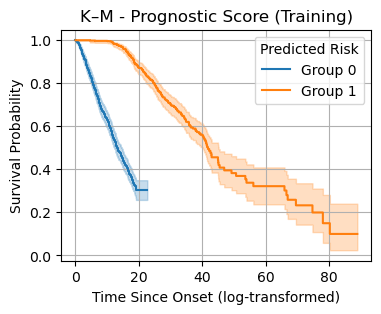

In [211]:
kmf = KaplanMeierFitter()

plt.figure(figsize=(4,3))

for group in train_dff['risk'].unique():
    mask = train_dff['risk'] == group
    kmf.fit(train_dff['Disease_Duration'][mask], event_observed=train_dff['Event'][mask],
            label=f'Group {group}')
    kmf.plot_survival_function(ci_show=True)

plt.title("K–M - Prognostic Score (Training)")
plt.xlabel("Time Since Onset (log-transformed)")
plt.ylabel("Survival Probability")
plt.legend(title="Predicted Risk")
plt.grid(True)
plt.show()

##### ***Statistical comparison between groups Use the log-rank test from lifelines***

In [212]:
from lifelines.statistics import logrank_test

group0 = train_dff[train_dff["risk"] == 0]
group1 = train_dff[train_dff["risk"] == 1]

results = logrank_test(group0["Disease_Duration"], group1["Disease_Duration"],
                       event_observed_A=group0["Event"],
                       event_observed_B=group1["Event"])

print(results.summary)


   test_statistic              p    -log2(p)
0      518.058638  1.119212e-114  378.537319


#### ***Test Set***

In [213]:
# Test set
betas = cph.params_

cov_centered = test_dff[betas.index] - test_dff[betas.index].mean()

test_dff['prognostic_score'] = cov_centered.dot(betas)

# Coefficients are in log relative hazard scale, convert to a relative hazard scale
test_dff['relative_hazard'] = np.exp(test_dff['prognostic_score'])

# Categorize prognostic score
test_dff['risk'] = np.where(test_dff['prognostic_score'] < test_dff['prognostic_score'].median(), 1, 0)
test_dff.head(2)

,Vital_capacity,Sex,Onset_site,European,Diagnostic_Delay,Age,TRICALS,Sex_onset_limb,Age_onset_limb,Disease_Duration,Event,prognostic_score,relative_hazard,risk
137,4.430817,1,0,1,14.640933,1.454181,0.404669,0,0.0,19.320302,1,1.039030,2.826475,1
604,4.151877,1,1,1,0.295664,1.028183,1.330012,1,69.0,3.088042,1,3.832152,46.161763,0


In [ ]:
# crosstab = pd.crosstab(test_dff['Event'], test_dff['risk'])
# print(crosstab)

# crosstab.plot(kind='bar', stacked=True, figsize=(4,3))

##### ***Compare the KM curves for 'risk' groups***

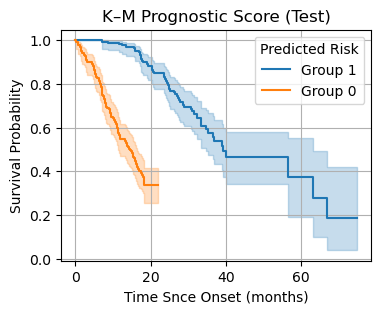

In [214]:
kmf = KaplanMeierFitter()

plt.figure(figsize=(4,3))

for group in test_dff['risk'].unique():
    mask = test_dff['risk'] == group
    kmf.fit(test_dff['Disease_Duration'][mask], event_observed=test_dff['Event'][mask],
            label=f'Group {group}')
    kmf.plot_survival_function(ci_show=True)

plt.title("K–M Prognostic Score (Test)")
plt.xlabel("Time Snce Onset (months)")
plt.ylabel("Survival Probability")
plt.legend(title="Predicted Risk")
plt.grid(True)
plt.show()

##### ***Statistical comparison between groups Use the log-rank test from lifelines***

In [215]:
from lifelines.statistics import logrank_test

group0 = test_dff[test_dff["risk"] == 0]
group1 = test_dff[test_dff["risk"] == 1]

results = logrank_test(group0["Disease_Duration"], group1["Disease_Duration"],
                       event_observed_A=group0["Event"],
                       event_observed_B=group1["Event"])

print(results.summary)


   test_statistic             p   -log2(p)
0       118.70875  1.212933e-27  89.413559


## ***Estimate Survival Time***

##### ***For training data***

In [218]:

surv_func = cph.predict_survival_function(train_dff[betas.index])
# print(surv_func)

# plt.figure(figsize=(3,2))
# surv_func.plot()
# plt.title("Predicted Survival Curve for New Patient")
# plt.xlabel("Time")
# plt.ylabel("Survival Probability")
# plt.show()

median_survival_time = []
for patient in surv_func.columns:
    surv_curve = surv_func[patient]
    below_half = surv_curve[surv_curve <= 0.5]
    if len(below_half) > 0:
        median_time = below_half.index.min()
    else:
        # fall back: take the maximum available time in the grid
        median_time = surv_curve.median()
        # median_time = surv_curve.index.max()
    median_survival_time.append(median_time)

train_dff['median_survival_time'] = median_survival_time
train_dff.head(2)

,Vital_capacity,Sex,Onset_site,European,Diagnostic_Delay,Age,TRICALS,Sex_onset_limb,Age_onset_limb,Disease_Duration,Event,prognostic_score,relative_hazard,risk,median_survival_time
1183,4.642032,1,1,1,0.229961,0.578939,0.514825,1,64.0,17.772668,0,1.777298,5.913857,0,15.998686
1386,4.440186,0,1,1,0.000000,0.399241,0.425460,0,62.0,17.411301,0,1.193876,3.299846,0,19.809461


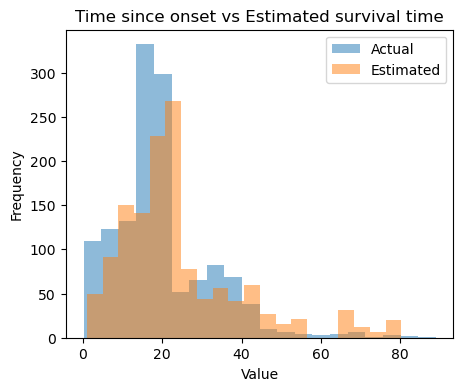

In [219]:
# Compare distributions
plt.figure(figsize=(5,4))
plt.hist(train_dff['Disease_Duration'], bins=20, alpha=0.5, label='Actual')
plt.hist(train_dff['median_survival_time'], bins=20, alpha=0.5, label='Estimated')

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Time since onset vs Estimated survival time")
plt.legend()
plt.show()

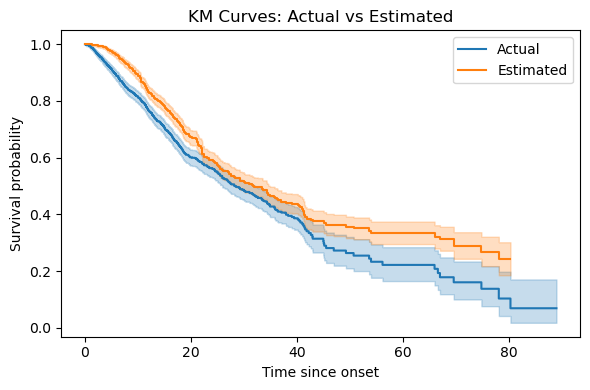

In [222]:
fig, ax = plt.subplots(figsize=(6,4))

km = KaplanMeierFitter()

# Actual survival
km.fit(train_dff['Disease_Duration'], event_observed=train_dff['Event'], label='Actual')
km.plot_survival_function(ax=ax)

# Estimated survival
km.fit(train_dff['median_survival_time'], event_observed=train_dff['Event'], label='Estimated')
km.plot_survival_function(ax=ax)

ax.set_title("KM Curves: Actual vs Estimated")
ax.set_xlabel("Time since onset")
ax.set_ylabel("Survival probability")
ax.legend()

plt.tight_layout()
plt.show()


##### ***For test data***

In [223]:
surv_func = cph.predict_survival_function(test_dff[betas.index])
# print(surv_func)

# plt.figure(figsize=(3,2))
# surv_func.plot()
# plt.title("Predicted Survival Curve for New Patient")
# plt.xlabel("Time")
# plt.ylabel("Survival Probability")
# plt.show()

median_survival_time = []
for patient in surv_func.columns:
    surv_curve = surv_func[patient]
    below_half = surv_curve[surv_curve <= 0.5]
    if len(below_half) > 0:
        median_time = below_half.index.min()
    else:
        # fall back: take the maximum available time in the grid
        median_time = surv_curve.median()
        # median_time = surv_curve.index.max()
    median_survival_time.append(median_time)

test_dff['median_survival_time'] = median_survival_time
test_dff.head(3)

,Vital_capacity,Sex,Onset_site,European,Diagnostic_Delay,Age,TRICALS,Sex_onset_limb,Age_onset_limb,Disease_Duration,Event,prognostic_score,relative_hazard,risk,median_survival_time
137,4.430817,1,0,1,14.640933,1.454181,0.404669,0,0.0,19.320302,1,1.039030,2.826475,1,21.742880
604,4.151877,1,1,1,0.295664,1.028183,1.330012,1,69.0,3.088042,1,3.832152,46.161763,0,5.321945
87,4.369448,1,0,1,9.165572,-1.103897,-0.685427,0,0.0,28.165572,0,-2.308880,0.099372,1,35.783301


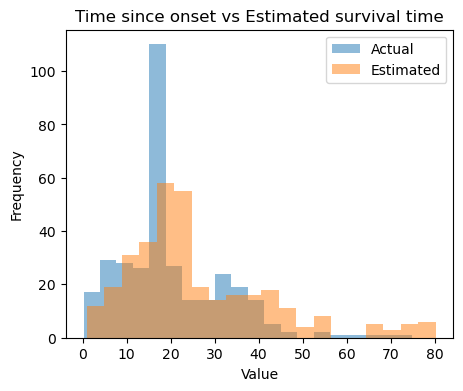

In [225]:
# Compare distributions
plt.figure(figsize=(5,4))
plt.hist(test_dff['Disease_Duration'], bins=20, alpha=0.5, label='Actual')
plt.hist(test_dff['median_survival_time'], bins=20, alpha=0.5, label='Estimated')
# plt.hist(np.log1p(test_dff['median_survival_time']), bins=20, alpha=0.5, label='Estimated2')

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Time since onset vs Estimated survival time")
plt.legend()
plt.show()

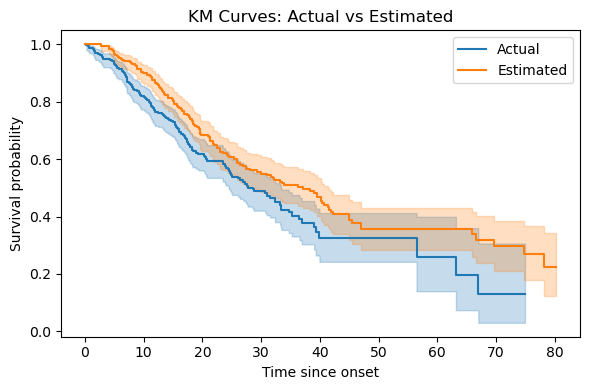

In [226]:
fig, ax = plt.subplots(figsize=(6,4))

km = KaplanMeierFitter()

# Actual survival
km.fit(test_dff['Disease_Duration'], event_observed=test_dff['Event'], label='Actual')
km.plot_survival_function(ax=ax)

# Estimated survival
km.fit(test_dff['median_survival_time'], event_observed=test_dff['Event'], label='Estimated')
km.plot_survival_function(ax=ax)

ax.set_title("KM Curves: Actual vs Estimated")
ax.set_xlabel("Time since onset")
ax.set_ylabel("Survival probability")
ax.legend()

plt.tight_layout()
plt.show()


## ***Simulate Virtual Placebo***

In [227]:
def simulate_cox_dataset(n,
                         baseline='weibull',
                         lam=0.1,
                         rho=1.0,
                         censor_rate = 0.3,
                         seed=None,
                         var_specs=None):
    """
    Simulate survival times under a cox proportional hazards model with mixed covariates.

    Parameters
    __________
    n: int = Number of observations.
    baseliine: str = exponential or weibull baseline hazard.
    lam: float = Baseline hazard parameter.
    rho: float = Shape parameter for weibull (ignore if exponential).
    censor_rate: float = Approximate censoring proportion.
    seed: int or None: Random seed.
    var_specs: list of dicts
        Each dict describes a variable. Example:
        {'name': 'age', 'type': 'continuous', 'dist': {'kind': 'normal', 'mean': 50, 'sd':10},
          'coef':0.02}
        {'name': 'sex', 'type': 'binary', 'prob':0.5, 'coef':0.3}
        {'name': 'treatment', 'type': 'categorical', 'levels': ['A', 'B', 'C'],
          'probs':[0.4,0.3,0.3], 'coef': {'B': 0.5, 'C':-0.2}, 'ref':'A'}

    Returns: pd.DataFrame = DataFrame with columns; time, event, linear_predictor, and covariates.
    
    """

    rng = np.random.default_rng(seed)
    if var_specs is None:
        raise ValueError('Provide var_specs describing variables and coefficients.')
    
    df = pd.DataFrame(index=np.arange(n))
    linear_pred = np.zeros(n)

    for spec in var_specs:
        name = spec['name']
        typ = spec['type'].lower()

        if typ == 'continuous':
            dist = spec.get('dist', {'kind': 'normal', 'mean':0, 'sd':1})
            if dist['kind'] == 'normal':
                x = rng.normal(loc=dist.get('mean', 0), scale=dist.get('sd', 1), size=n)
            elif dist['kind'] == 'uniform':
                x = rng.uniform(low=dist.get('low',0), high=dist.get('high',1), size=n)
            else:
                raise ValueError('Unsupported continuous dist kind')
            coef = float(spec.get('coef', 0.0))
            df[name] = x
            linear_pred +=coef * x 

        elif typ == 'binary':
            p = float(spec.get('prob',0.5))
            x = rng.binomial(1, p, size=n)
            coef = float(spec.get('coef',0.0))
            df[name] = x.astype(int)
            linear_pred += coef * x 

        elif typ == 'categorical':
            levels = list(spec.get('levels'))
            probs = spec.get('probs', [1/len(levels)]*len(levels))
            cats = rng.choice(levels, size=n, p=probs)
            df[name] = pd.Categorical(cats, categories=levels)
            coef_map = spec.get('coef', {})
            ref = spec.get('ref', levels[0])
            for lvl in levels:
                if lvl == ref:
                    continue
                lvl_coef = float(coef_map.get(lvl, 0.0))
                linear_pred += lvl_coef * (cats == lvl)
        else:
            raise ValueError('Unsupported variable type: ' + typ)
        
    # Generate survival times via inverse transform
    U = rng.uniform(size=n)
    if baseline == 'exponential' or rho == 1.0:
        T = -np.log(U) / (lam * np.exp(linear_pred))
    elif baseline == 'weibull':
        T = ((-np.log(U))) / (lam * np.exp(linear_pred)) ** (1.0/ rho)
    else:
        raise ValueError('Unsupported baseline: ' + baseline)
    
    # Generate censoring times (exponential heuristic)
    censor_rate = max(1e-6, T.mean() * censor_rate / (1 - censor_rate + 1e-9))
    C = rng.exponential(scale=censor_rate, size=n)

    observed_time = np.minimum(T, C)
    event = (T <= C).astype(int)

    df['time'] = observed_time
    df['event'] = event
    df['true_survival_time'] = T
    df['linear_predictor'] = linear_pred

    cols = ['time', 'event', 'true_survival_time', 'linear_predictor'] + [c for c in df.columns if c not in ['time', 'event', 'true_survival_time', 'linear_predictor']]
    df = df[cols]
    return df

In [228]:
df.columns

Index(['subject_id', 'Event', 'Vital_capacity', 'Sex', 'Onset_site',
       'Study_Arm', 'European', 'Diagnostic_Delay', 'Disease_Duration',
       'Study_id', 'Expt', 'Age', 'TRICALS', 'Sex_onset_limb',
       'Age_onset_limb'],
      dtype='object')

In [236]:
print(f"{df.Event.value_counts() / df.Event.value_counts().sum()}\n")
print(f"{df.Onset_site.value_counts() / df.Onset_site.value_counts().sum()}\n")
print(f'{df.Sex.value_counts() / df.Sex.value_counts().sum()}\n')
print(f'{df.European.value_counts() / df.European.value_counts().sum()}\n')
# print(df.Riluzole_use.value_counts() / df.Riluzole_use.value_counts().sum())

print(f'Age: {df['Age'].mean():.2f}, {df['Age'].std():.2f}\n')
print(f'TRICALS: {df['TRICALS'].mean():.2f}, {df['TRICALS'].std():.2f}\n')
# print(f'ALSFRS_Rasch: {df['ALSFRS_Rasch'].mean():.2f}, {df['ALSFRS_Rasch'].std():.2f}')
print(f'Diagnostic_Delay: {df['Diagnostic_Delay'].mean():.2f}, {df['Diagnostic_Delay'].std():.2f}')

Event
0    0.526222
1    0.473778
Name: count, dtype: float64

Onset_site
1    0.876043
0    0.123957
Name: count, dtype: float64

Sex
1    0.601907
0    0.398093
Name: count, dtype: float64

European
1    0.982718
0    0.017282
Name: count, dtype: float64

Age: 0.00, 1.00

TRICALS: 0.00, 1.00

Diagnostic_Delay: 5.51, 10.21


In [237]:
betas

covariate
Vital_capacity      1.826202
Diagnostic_Delay    0.050600
Age                -0.355238
Sex                -0.050043
TRICALS             3.547862
Onset_site          0.594069
Name: coef, dtype: float64

In [240]:
ons = df.Onset_site.value_counts() / df.Onset_site.value_counts().sum()
sex = df.Sex.value_counts() / df.Sex.value_counts().sum()

In [ ]:
# train_dff.shape[0]

1342

In [277]:
var_specs_real = [
    # continuous
    {'name':'Age','type':'continuous','dist':{'kind':'normal','mean':0,'sd':1},'coef':betas['Age']},
    {'name':'TRICALS','type':'continuous','dist':{'kind':'normal','mean':0,'sd':1},'coef':betas['TRICALS']},
    {'name':'Diagnostic_Delay','type':'continuous','dist':{'kind':'normal','mean':df['Diagnostic_Delay'].mean(),
                                                           'sd':df['Diagnostic_Delay'].std()},
                                                           'coef':betas['Diagnostic_Delay']},
    {'name':'Vital_capacity','type':'continuous','dist':{'kind':'normal','mean':df['Vital_capacity'].mean(),
                                                           'sd':df['Vital_capacity'].std()},
                                                           'coef':betas['Vital_capacity']},

    # binary
    {'name':'Sex','type':'binary','prob':sex[1],'coef':betas['Sex']},
    {'name':'Onset_site','type':'binary','prob':ons[1],'coef':betas['Onset_site']}
    
    # # categorical
    # {'name':'Onset_site','type':'categorical',
    #  'levels':['bulbar','limb','other'],'probs':[0.218484,0.746833,0.034683],
    #  'coef':{'limb':1.151159,'other':2.508786},'ref':'bulbar'}
    
    # interactions not included yet!
]

df_sim = simulate_cox_dataset(n=train_dff.shape[0], baseline='weibull', lam=0.01, rho=1.5, 
                              censor_rate=0.3, seed=42, var_specs=var_specs_real)

df_sim.head(3)

,time,event,true_survival_time,linear_predictor,Age,TRICALS,Diagnostic_Delay,Vital_capacity,Sex,Onset_site
0,0.042967,1,0.042967,9.228084,0.304717,0.438991,-9.651540,4.229100,1,1
1,0.008252,0,0.234018,7.253519,-1.039984,-0.526715,6.950231,4.600317,0,0
2,0.640488,1,0.640488,3.367280,0.750451,-1.032397,-12.416660,4.366983,1,0


In [278]:
# Identify categorical columns
# cat_sim = ['Onset_site']  # replace with your actual categorical columns

# One-hot encode
# sim_onehot = pd.get_dummies(df_sim, columns=cat_sim, drop_first=True)
sim_onehot = df_sim

# sim_onehot['Onset_site_limb'] = sim_onehot['Onset_site_limb'].astype(int)

# # Create interactions
# sim_onehot['Sex_onset_limb'] = sim_onehot['Sex_Male']*sim_onehot['Onset_site_limb']

# sim_onehot['Sex_Riluzole'] = sim_onehot['Sex_Male']*sim_onehot['Riluzole_use_Yes']
# sim_onehot['Trical_Riluzole'] = sim_onehot['TRICALS']*sim_onehot['Riluzole_use_Yes']
# sim_onehot['Age_Riluzole'] = sim_onehot['Age']*sim_onehot['Riluzole_use_Yes']

sim_onehot.head(3)


,time,event,true_survival_time,linear_predictor,Age,TRICALS,Diagnostic_Delay,Vital_capacity,Sex,Onset_site
0,0.042967,1,0.042967,9.228084,0.304717,0.438991,-9.651540,4.229100,1,1
1,0.008252,0,0.234018,7.253519,-1.039984,-0.526715,6.950231,4.600317,0,0
2,0.640488,1,0.640488,3.367280,0.750451,-1.032397,-12.416660,4.366983,1,0


In [279]:
# Simulated prognostic score
betas = cph.params_

cov_centered = sim_onehot[betas.index] - sim_onehot[betas.index].mean()

sim_onehot['prognostic_score'] = cov_centered.dot(betas)

# Coefficients are in log relative hazard scale, convert to a relative hazard scale
sim_onehot['relative_hazard'] = np.exp(sim_onehot['prognostic_score'])

# Categorize prognostic score
sim_onehot['risk'] = np.where(sim_onehot['prognostic_score'] < sim_onehot['prognostic_score'].mean(), 1, 0)
sim_onehot.head(2)

,time,event,true_survival_time,linear_predictor,Age,TRICALS,Diagnostic_Delay,Vital_capacity,Sex,Onset_site,prognostic_score,relative_hazard,risk
0,0.042967,1,0.042967,9.228084,0.304717,0.438991,-9.651540,4.229100,1,1,0.527809,1.695215,0
1,0.008252,0,0.234018,7.253519,-1.039984,-0.526715,6.950231,4.600317,0,0,-1.446756,0.235333,1


In [280]:
sim_onehot.risk.value_counts()

risk
0    677
1    665
Name: count, dtype: int64

In [281]:
# Survival time for simulated patients
surv_func = cph.predict_survival_function(sim_onehot[betas.index])

median_survival_time = []
for patient in surv_func.columns:
    surv_curve = surv_func[patient]
    below_half = surv_curve[surv_curve <= 0.5]
    if len(below_half) > 0:
        median_time = below_half.index.min()
    else:
        # fall back: take the maximum available time in the grid
        median_time = surv_curve.median()
    median_survival_time.append(median_time)

sim_onehot['median_survival_time'] = median_survival_time
sim_onehot.head(2)

,time,event,true_survival_time,linear_predictor,Age,TRICALS,Diagnostic_Delay,Vital_capacity,Sex,Onset_site,prognostic_score,relative_hazard,risk,median_survival_time
0,0.042967,1,0.042967,9.228084,0.304717,0.438991,-9.651540,4.229100,1,1,0.527809,1.695215,0,23.052841
1,0.008252,0,0.234018,7.253519,-1.039984,-0.526715,6.950231,4.600317,0,0,-1.446756,0.235333,1,31.505125


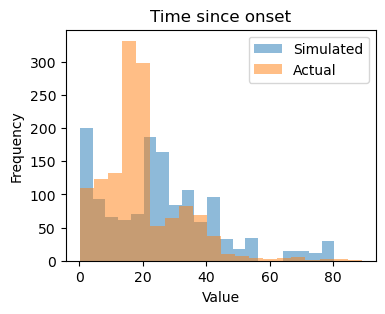

In [282]:
# Compare distributions
plt.figure(figsize=(4,3))
# plt.hist(train_df['Disease_Duration'], bins=20, alpha=0.5, label='Actual')
plt.hist(sim_onehot['median_survival_time'], bins=20, alpha=0.5, label='Simulated')
plt.hist(train_df['Disease_Duration'], bins=20, alpha=0.5, label='Actual')

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Time since onset")
plt.legend()
plt.show()

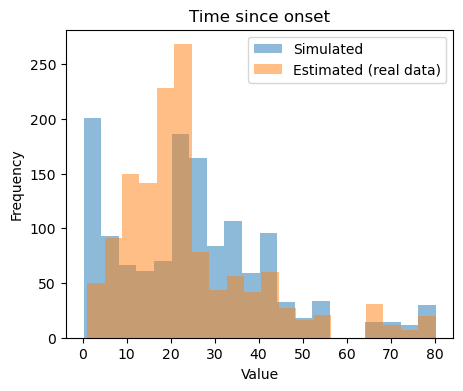

In [283]:
# Compare distributions
plt.figure(figsize=(5,4))
# plt.hist(train_df['Disease_Duration'], bins=20, alpha=0.5, label='Actual')
plt.hist(sim_onehot['median_survival_time'], bins=20, alpha=0.5, label='Simulated')
plt.hist(train_df['median_survival_time'], bins=20, alpha=0.5, label='Estimated (real data)')

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Time since onset")
plt.legend()
plt.show()

In [284]:
# sim_onehot.describe(include='all')

In [285]:
# train_df.describe(include='all')

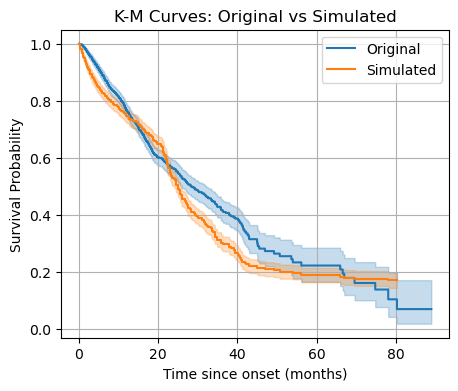

In [286]:
# Original data
km_orig = KaplanMeierFitter()
km_orig.fit(train_df['Disease_Duration'], event_observed=train_df['Event'], label='Original')

# Simulated data
km_sim1 = KaplanMeierFitter()
km_sim1.fit(sim_onehot['median_survival_time'], event_observed=sim_onehot['event'], label='Simulated')

# # Simulated data
# km_sim2 = KaplanMeierFitter()
# km_sim2.fit(df_sim['time'], event_observed=df_sim['event'], label='Simulated event')

# Plot together
plt.figure(figsize=(5,4))
km_orig.plot()
km_sim1.plot()
# km_sim2.plot()
plt.title('K-M Curves: Original vs Simulated')
plt.xlabel('Time since onset (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


In [287]:
# train_df1 = train_df[['Event', 'Disease_Duration','Age.', 'TRICALS.','ALSFRS_Rasch.',
#                       'Diagnosis_delay.', 'Onset_site_limb', 'Onset_site_other', 
#                       'Riluzole_use_Yes','European_1.0', 'Sex_Male']]

In [288]:
# # Fit Cox model
# cph = CoxPHFitter()
# cph.fit(train_df, duration_col="Disease_Duration", event_col="Event")

# # Simulate new dataset
# sim_df = simulate_from_cox(
#     cph,
#     train_df,
#     n=len(train_df),
#     duration_col="Disease_Duration",
#     event_col="Event",
#     rng_seed=42
# )

# print("Target events:", sim_df.attrs['target_events'])
# print("Simulated events:", sim_df.attrs['simulated_events'])
# sim_df.head()

##### 1. Compare survival distributions

In [289]:
# sim_onehot.median_survival_time.describe()

In [290]:
# train_df.Disease_Durationc.describe()

In [291]:
sim_onehot.risk.value_counts()

risk
0    677
1    665
Name: count, dtype: int64

In [292]:
# Original data
# km_orig = KaplanMeierFitter()
# km_orig.fit(train_df['Disease_Duration'], event_observed=train_df['Event'], label='Original')

# # Simulated data
# km_sim = KaplanMeierFitter()
# km_sim.fit(sim_onehot['median_survival_time'], event_observed=sim_onehot['event'], label='Simulated')

# # Plot together
# plt.figure(figsize=(5,4))
# km_orig.plot()
# km_sim.plot()
# plt.title('Kaplan-Meier Curves: Original vs Simulated')
# plt.xlabel('Disease Duration (months)')
# plt.ylabel('Survival Probability')
# plt.grid(True)
# plt.show()


##### 2. Compare covariate distributions

In [293]:
sim_onehot.columns

Index(['time', 'event', 'true_survival_time', 'linear_predictor', 'Age',
       'TRICALS', 'Diagnostic_Delay', 'Vital_capacity', 'Sex', 'Onset_site',
       'prognostic_score', 'relative_hazard', 'risk', 'median_survival_time'],
      dtype='object')

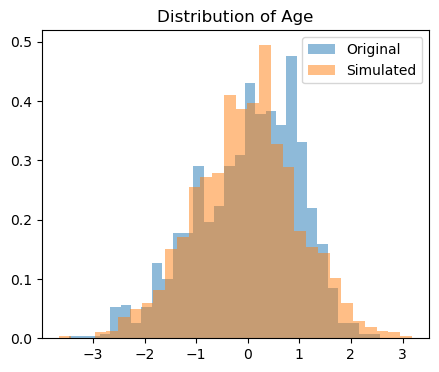

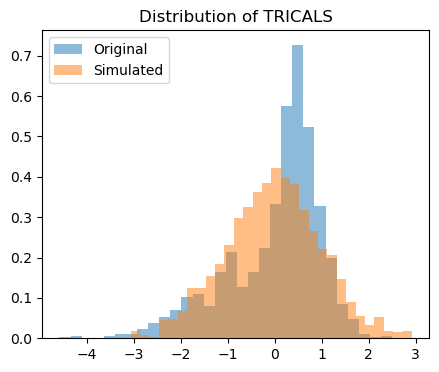

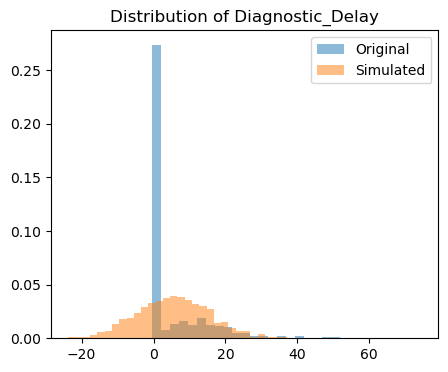

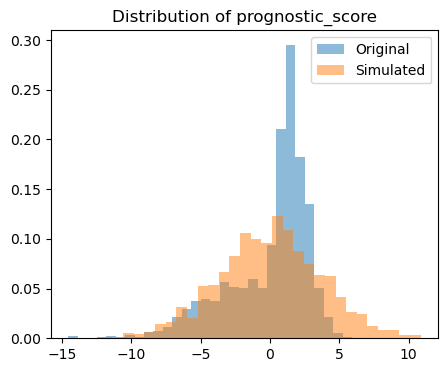

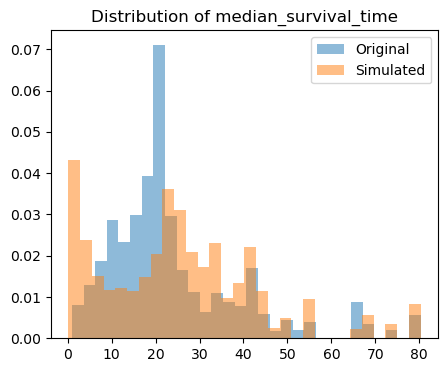

In [294]:
for col in ['Age', 'TRICALS',  'Diagnostic_Delay', 'prognostic_score', 'median_survival_time']:  # replace with your continuous columns
    plt.figure(figsize=(5,4))
    plt.hist(train_df[col], bins=30, alpha=0.5, label='Original', density=True)
    plt.hist(sim_onehot[col], bins=30, alpha=0.5, label='Simulated', density=True)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()


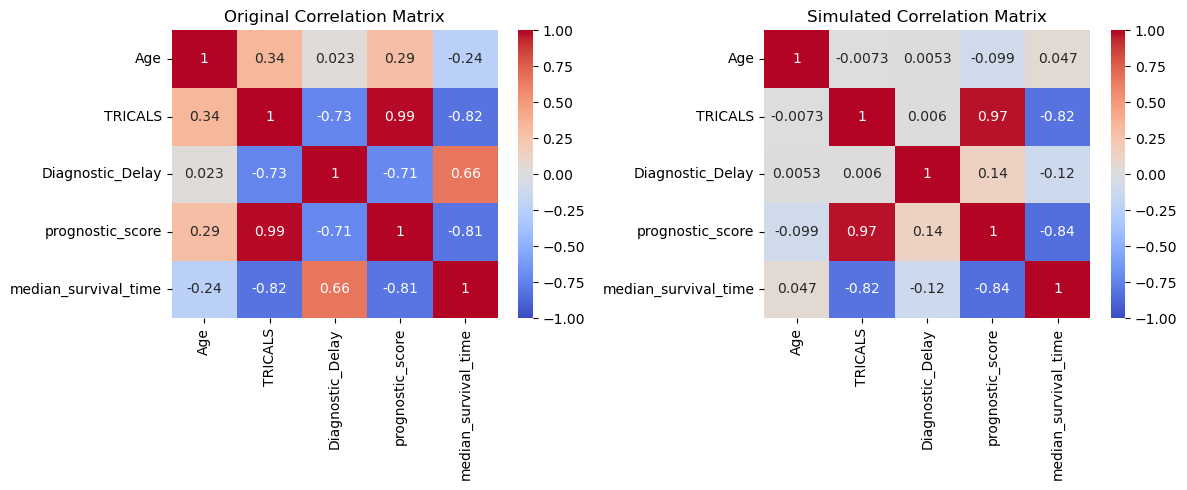

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'TRICALS', 'Diagnostic_Delay', 'prognostic_score', 'median_survival_time']

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Original correlation
sns.heatmap(train_df[cols].corr(), annot=True, cmap="coolwarm", ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title("Original Correlation Matrix")

# Simulated correlation
sns.heatmap(sim_onehot[cols].corr(), annot=True, cmap="coolwarm", ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title("Simulated Correlation Matrix")

plt.tight_layout()
plt.show()


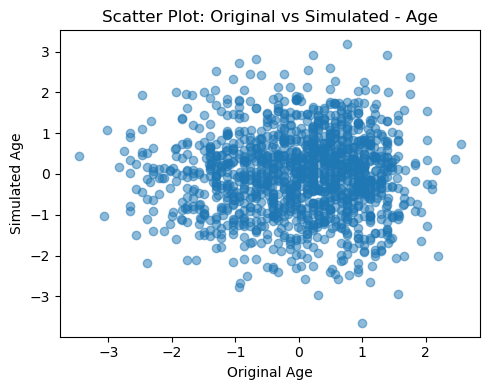

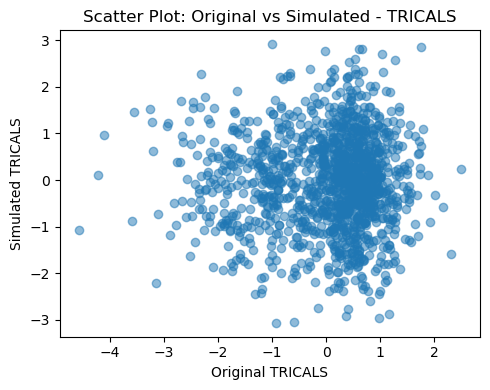

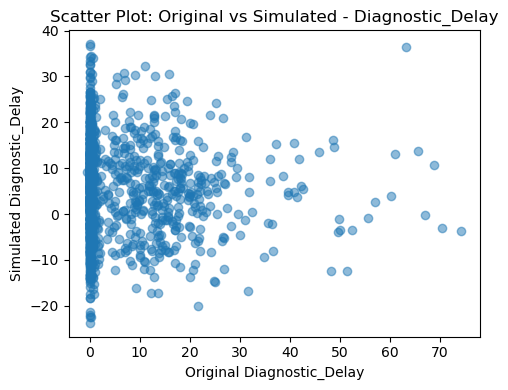

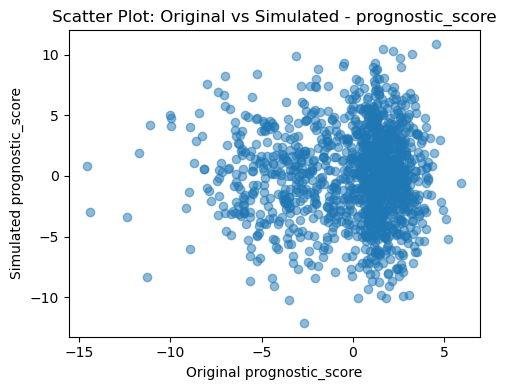

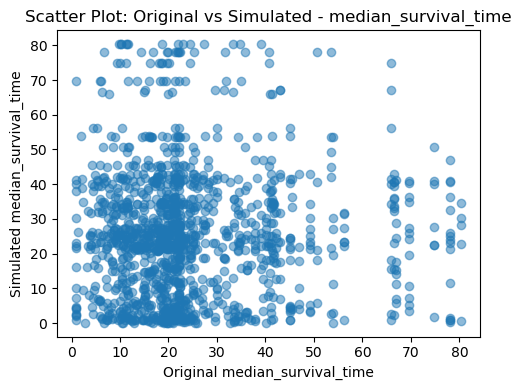

In [296]:
for col in ['Age', 'TRICALS', 'Diagnostic_Delay', 'prognostic_score', 'median_survival_time']:  
    plt.figure(figsize=(5,4))

    plt.scatter(train_dff[col], sim_onehot[col], alpha=0.5)

    plt.xlabel(f'Original {col}')
    plt.ylabel(f'Simulated {col}')
    plt.title(f'Scatter Plot: Original vs Simulated - {col}')

    plt.tight_layout()
    plt.show()


In [297]:
# categorical_cols = ['Onset_site_limb', 'Riluzole_use_Yes', 'European_1', 'Sex_Male', 
#        'Sex_onset_limb', 'Sex_Riluzole']  # your categorical columns

# for col in categorical_cols:
#     # Compute normalized value counts
#     orig_counts = train_df[col].value_counts(normalize=True).sort_index()
#     sim_counts = sim_onehot[col].value_counts(normalize=True).reindex(orig_counts.index, fill_value=0)

#     # Setup bar positions
#     x = np.arange(len(orig_counts))
#     width = 0.35

#     # Plot bars
#     fig, ax = plt.subplots(figsize=(5,4))
#     ax.bar(x - width/2, orig_counts.values, width, label='Original', color='skyblue')
#     ax.bar(x + width/2, sim_counts.values, width, label='Simulated', color='salmon')

#     # Labels and title
#     ax.set_xticks(x)
#     ax.set_xticklabels(orig_counts.index, rotation=45)
#     ax.set_ylabel('Proportion')
#     ax.set_title(f'Comparison of {col}: Original vs Simulated')
#     ax.legend()

#     plt.tight_layout()
#     plt.show()



##### 3. Check event proportions

In [298]:
print("Original events:", train_df['Event'].sum(), " / ", len(train_df))
print("Simulated events:", sim_onehot['event'].sum(), " / ", len(sim_onehot))

Original events: 634  /  1342
Simulated events: 991  /  1342


##### 4. Compare Cox model coefficients

In [299]:
sim_onehot.columns

Index(['time', 'event', 'true_survival_time', 'linear_predictor', 'Age',
       'TRICALS', 'Diagnostic_Delay', 'Vital_capacity', 'Sex', 'Onset_site',
       'prognostic_score', 'relative_hazard', 'risk', 'median_survival_time'],
      dtype='object')

In [300]:
betas.to_dict()

{'Vital_capacity': 1.8262023662790468,
 'Diagnostic_Delay': 0.050599891765145295,
 'Age': -0.35523767632356884,
 'Sex': -0.050043082681181496,
 'TRICALS': 3.5478624957264153,
 'Onset_site': 0.5940689444105144}

In [301]:
# sim_onehot1 = sim_onehot[['Age','TRICALS', 'ALSFRS_Rasch', 'Diagnosis_delay', 'Sex_Male','Height',
#        'Riluzole_use_Yes', 'European_1', 'Onset_site_limb','Sex_onset_limb', 'Sex_Riluzole',
#        'Trical_Riluzole', 'event', 'median_survival_time']]

In [302]:
sim_onehot1 = sim_onehot[betas.index.tolist() + ['event', 'median_survival_time']]
sim_onehot1.head(2)

,Vital_capacity,Diagnostic_Delay,Age,Sex,TRICALS,Onset_site,event,median_survival_time
0,4.229100,-9.651540,0.304717,1,0.438991,1,1,23.052841
1,4.600317,6.950231,-1.039984,0,-0.526715,0,0,31.505125


In [305]:
sim_onehot1 = sim_onehot1.copy()
sim_onehot1['Sex_onset_limb'] = sim_onehot1['Sex']*sim_onehot1['Onset_site']
sim_onehot1['Age_onset_limb'] = sim_onehot1['Age']*sim_onehot1['Onset_site']

In [306]:
sim_onehot1.head(2)

,Vital_capacity,Diagnostic_Delay,Age,Sex,TRICALS,Onset_site,event,median_survival_time,Sex_onset_limb,Age_onset_limb
0,4.229100,-9.651540,0.304717,1,0.438991,1,1,23.052841,1,0.304717
1,4.600317,6.950231,-1.039984,0,-0.526715,0,0,31.505125,0,-0.000000


In [307]:
# Train / Test split

# Separate features from survival info
X = sim_onehot1.drop(columns=['median_survival_time', 'event'])
y_duration = sim_onehot1['median_survival_time']
y_event = sim_onehot1['event']

# Split
X_train, X_test, y_duration_train, y_duration_test, y_event_train, y_event_test = train_test_split(
    X, y_duration, y_event, test_size=0.2, random_state=4
)

# Combine back for lifelines format
simtrain_df = X_train.copy()
simtrain_df['median_survival_time'] = y_duration_train
simtrain_df['event'] = y_event_train

simtest_df = X_test.copy()
simtest_df['median_survival_time'] = y_duration_test
simtest_df['event'] = y_event_test

# print(train_df)
# print(test_df)

/opt/anaconda3/envs/digital_twins_2/lib/python3.13/site-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


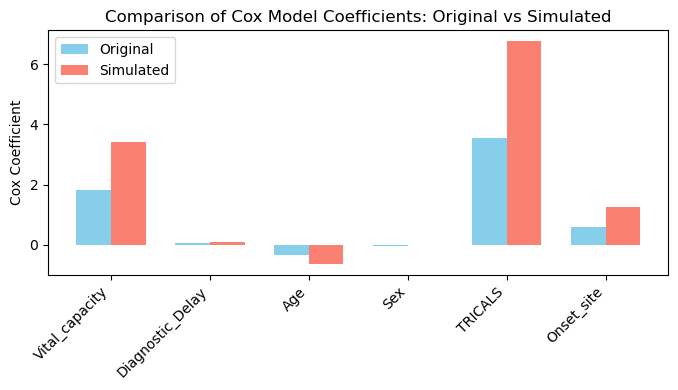

In [308]:
# Fit Cox on simulated data
cph_sim = CoxPHFitter()
cph_sim.fit(simtrain_df, duration_col="median_survival_time", event_col="event")

# Extract coefficients
coeff_orig = cph.params_
coeff_sim = cph_sim.params_

# Align indices (covariates) in case of any mismatch
common_idx = coeff_orig.index.intersection(coeff_sim.index)
coeff_orig = coeff_orig[common_idx]
coeff_sim = coeff_sim[common_idx]

# Plot
x = np.arange(len(common_idx))
width = 0.35

fig, ax = plt.subplots(figsize=(7,4))
ax.bar(x - width/2, coeff_orig.values, width, label='Original', color='skyblue')
ax.bar(x + width/2, coeff_sim.values, width, label='Simulated', color='salmon')

ax.set_xticks(x)
ax.set_xticklabels(common_idx, rotation=45, ha='right')
ax.set_ylabel('Cox Coefficient')
ax.set_title('Comparison of Cox Model Coefficients: Original vs Simulated')
ax.legend()
plt.tight_layout()
plt.show()

In [309]:
# coeff_sim

##### 5. Optional: Compare survival curves stratified by covariates

In [310]:
# for group in train_df['Sexx_Male'].unique():
#     km_orig.fit(train_df.loc[train_df['Sexx_Male']==group, 'Disease_Duration'],
#                 event_observed=train_df.loc[train_df['Sexx_Male']==group, 'Event'], label=f'Original-{group}')
#     km_sim.fit(sim_df.loc[sim_df['Sexx_Male']==group, 'Disease_DurationM'],
#                event_observed=sim_df.loc[sim_df['Sexx_Male']==group, 'Event'], label=f'Simulated-{group}')
#     plt.figure()
#     km_orig.plot()
#     km_sim.plot()
#     plt.title(f'Survival by Sexx_Male={group}')
#     plt.grid(True)
#     plt.show()

##### Compare survival distributions of original active and original placebo

In [311]:
df_pla = df_onehot[df_onehot['Study_Arm'] == 'Placebo']
df_act = df_onehot[df_onehot['Study_Arm'] == 'Active']

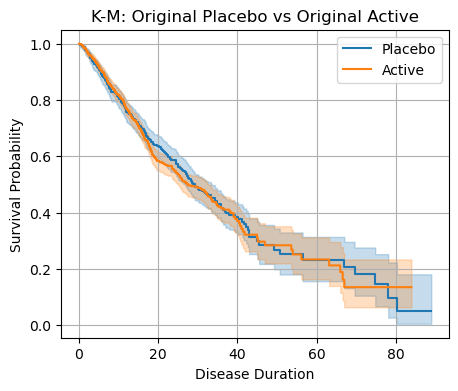

In [312]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Original data
km_orig = KaplanMeierFitter()
km_orig.fit(df_pla['Disease_Duration'], event_observed=df_pla['Event'], label='Placebo')

# Simulated data
km_sim = KaplanMeierFitter()
km_sim.fit(df_act['Disease_Duration'], event_observed=df_act['Event'], label='Active')

# Plot together
plt.figure(figsize=(5,4))
km_orig.plot()
km_sim.plot()
plt.title('K-M: Original Placebo vs Original Active')
plt.xlabel('Disease Duration')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


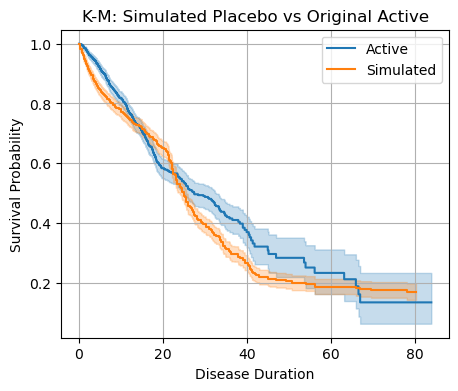

In [313]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Original data
km_orig = KaplanMeierFitter()
km_orig.fit(df_act['Disease_Duration'], event_observed=df_act['Event'], label='Active')

# Simulated data
km_sim = KaplanMeierFitter()
km_sim.fit(sim_onehot['median_survival_time'], event_observed=sim_onehot['event'], label='Simulated')

# Plot together
plt.figure(figsize=(5,4))
km_orig.plot()
km_sim.plot()
plt.title('K-M: Simulated Placebo vs Original Active')
plt.xlabel('Disease Duration')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

In [803]:
train_df.columns
betas.index

Index(['Age', 'Height', 'ALSFRS_Rasch', 'Diagnosis_delay', 'TRICALS',
       'Onset_site_limb', 'Riluzole_use_Yes', 'European_1', 'Sex_Male',
       'Sex_onset_limb', 'Age_Riluzole', 'Trical_Riluzole'],
      dtype='object', name='covariate')

In [805]:
# miro.isna().sum()